In [146]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as sm

# Visualisation
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from sklearn import metrics
%matplotlib inline
plt.style.use('seaborn-white')
# helpful character encoding module
import chardet

# set seed for reproducibility
np.random.seed(0)

from wordcloud import WordCloud
import warnings

In [148]:
### Importing data file

In [149]:
y_1=pd.read_csv(r'C:\Users\prave\Downloads\youtube-new\USvideos.csv')
y_2=pd.read_csv(r'C:\Users\prave\Downloads\youtube-new\CAvideos.csv')
y_3=pd.read_csv(r'C:\Users\prave\Downloads\youtube-new\INvideos.csv')

In [94]:
#combine tables
three_countries=pd.concat([y_1,y_2,y_3])
three_countries.shape


(119182, 16)

In [95]:
#Check duplicate. It is always good to check whether there are some duplicates in dataset!
three_countries.video_id.value_counts()[:10]

#NAME?         511
TjXQzRWmb_I     40
rRr1qiJRsXk     39
u9Mv98Gr5pY     38
UUkn-enk2RU     38
6S9c5nnDd_s     37
voG07pt-KYI     37
r-3iathMo7o     37
UfKmSfgFxi8     36
XiHiW4N7-bo     35
Name: video_id, dtype: int64

In [99]:
#remove duplicate
three_countries= three_countries.drop_duplicates(['video_id'], keep='first')

In [100]:
three_countries.video_id.value_counts()[:10]

4dSKZeAIsHY    1
PI83n6brJws    1
ATXUugiHfPI    1
YfL3as6CspE    1
5JXrvulTg5M    1
pOEzjT-SED0    1
Iqbhl20fyaY    1
3I49_goRLDU    1
Ax1P5Q8Kr9g    1
DXb5jVSnV3s    1
Name: video_id, dtype: int64

In [101]:
#need to be decoded 
three_countries.category_id.head()

0    22
1    24
2    23
3    24
4    24
Name: category_id, dtype: int64

In [102]:
three_countries['category_name'] = np.nan
three_countries.loc[(three_countries['category_id'] == 1),"category_name"] = 'Film and Animation'
three_countries.loc[(three_countries['category_id'] == 2),"category_name"] = 'Cars and Vehicles'
three_countries.loc[(three_countries['category_id'] == 10),"category_name"] = 'Music'
three_countries.loc[(three_countries['category_id'] == 15),"category_name"] = 'Pets and Animals'
three_countries.loc[(three_countries["category_id"] == 17),"category_name"] = 'Sport'
three_countries.loc[(three_countries["category_id"] == 19),"category_name"] = 'Travel and Events'
three_countries.loc[(three_countries["category_id"] == 20),"category_name"] = 'Gaming'
three_countries.loc[(three_countries["category_id"] == 22),"category_name"] = 'People and Blogs'
three_countries.loc[(three_countries["category_id"] == 23),"category_name"] = 'Comedy'
three_countries.loc[(three_countries["category_id"] == 24),"category_name"] = 'Entertainment'
three_countries.loc[(three_countries["category_id"] == 25),"category_name"] = 'News and Politics'
three_countries.loc[(three_countries["category_id"] == 26),"category_name"] = 'How to and Style'
three_countries.loc[(three_countries["category_id"] == 27),"category_name"] = 'Education'
three_countries.loc[(three_countries["category_id"] == 28),"category_name"] = 'Science and Technology'
three_countries.loc[(three_countries["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
three_countries.loc[(three_countries["category_id"] == 25),"category_name"] = 'News & Politics'

In [103]:
#now, we have category name :)
three_countries['category_name'].head()

0    People and Blogs
1       Entertainment
2              Comedy
3       Entertainment
4       Entertainment
Name: category_name, dtype: object

In [104]:
three_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43349 entries, 0 to 37301
Data columns (total 17 columns):
video_id                  43349 non-null object
trending_date             43349 non-null object
title                     43349 non-null object
channel_title             43349 non-null object
category_id               43349 non-null int64
publish_time              43349 non-null object
tags                      43349 non-null object
views                     43349 non-null int64
likes                     43349 non-null int64
dislikes                  43349 non-null int64
comment_count             43349 non-null int64
thumbnail_link            43349 non-null object
comments_disabled         43349 non-null bool
ratings_disabled          43349 non-null bool
video_error_or_removed    43349 non-null bool
description               42013 non-null object
category_name             43196 non-null object
dtypes: bool(3), int64(5), object(9)
memory usage: 5.1+ MB


In [105]:
#give you a report of distribution of data/correlation
import pandas_profiling as pp

pp.ProfileReport(three_countries[['views','likes','dislikes','comment_count']])

In [106]:
Q1 = three_countries.views.quantile(0.25)
Q3 = three_countries.views.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

popular_videos=three_countries.loc[three_countries.views > (Q3 + 1.5 * IQR)]

three_countries['popular']=0
three_countries.loc[three_countries.views > (Q3 + 1.5 * IQR),'popular']=1

three_countries['popular'].value_counts()

326935.0


0    39118
1     4231
Name: popular, dtype: int64

In [107]:
#make a variable that tells ratio of like and dislike
three_countries['like_percentage']=(three_countries['likes']/(three_countries['likes']+three_countries['dislikes'])*100)
#date column as datatime datatype
three_countries["publish_time"] = pd.to_datetime(three_countries["publish_time"])

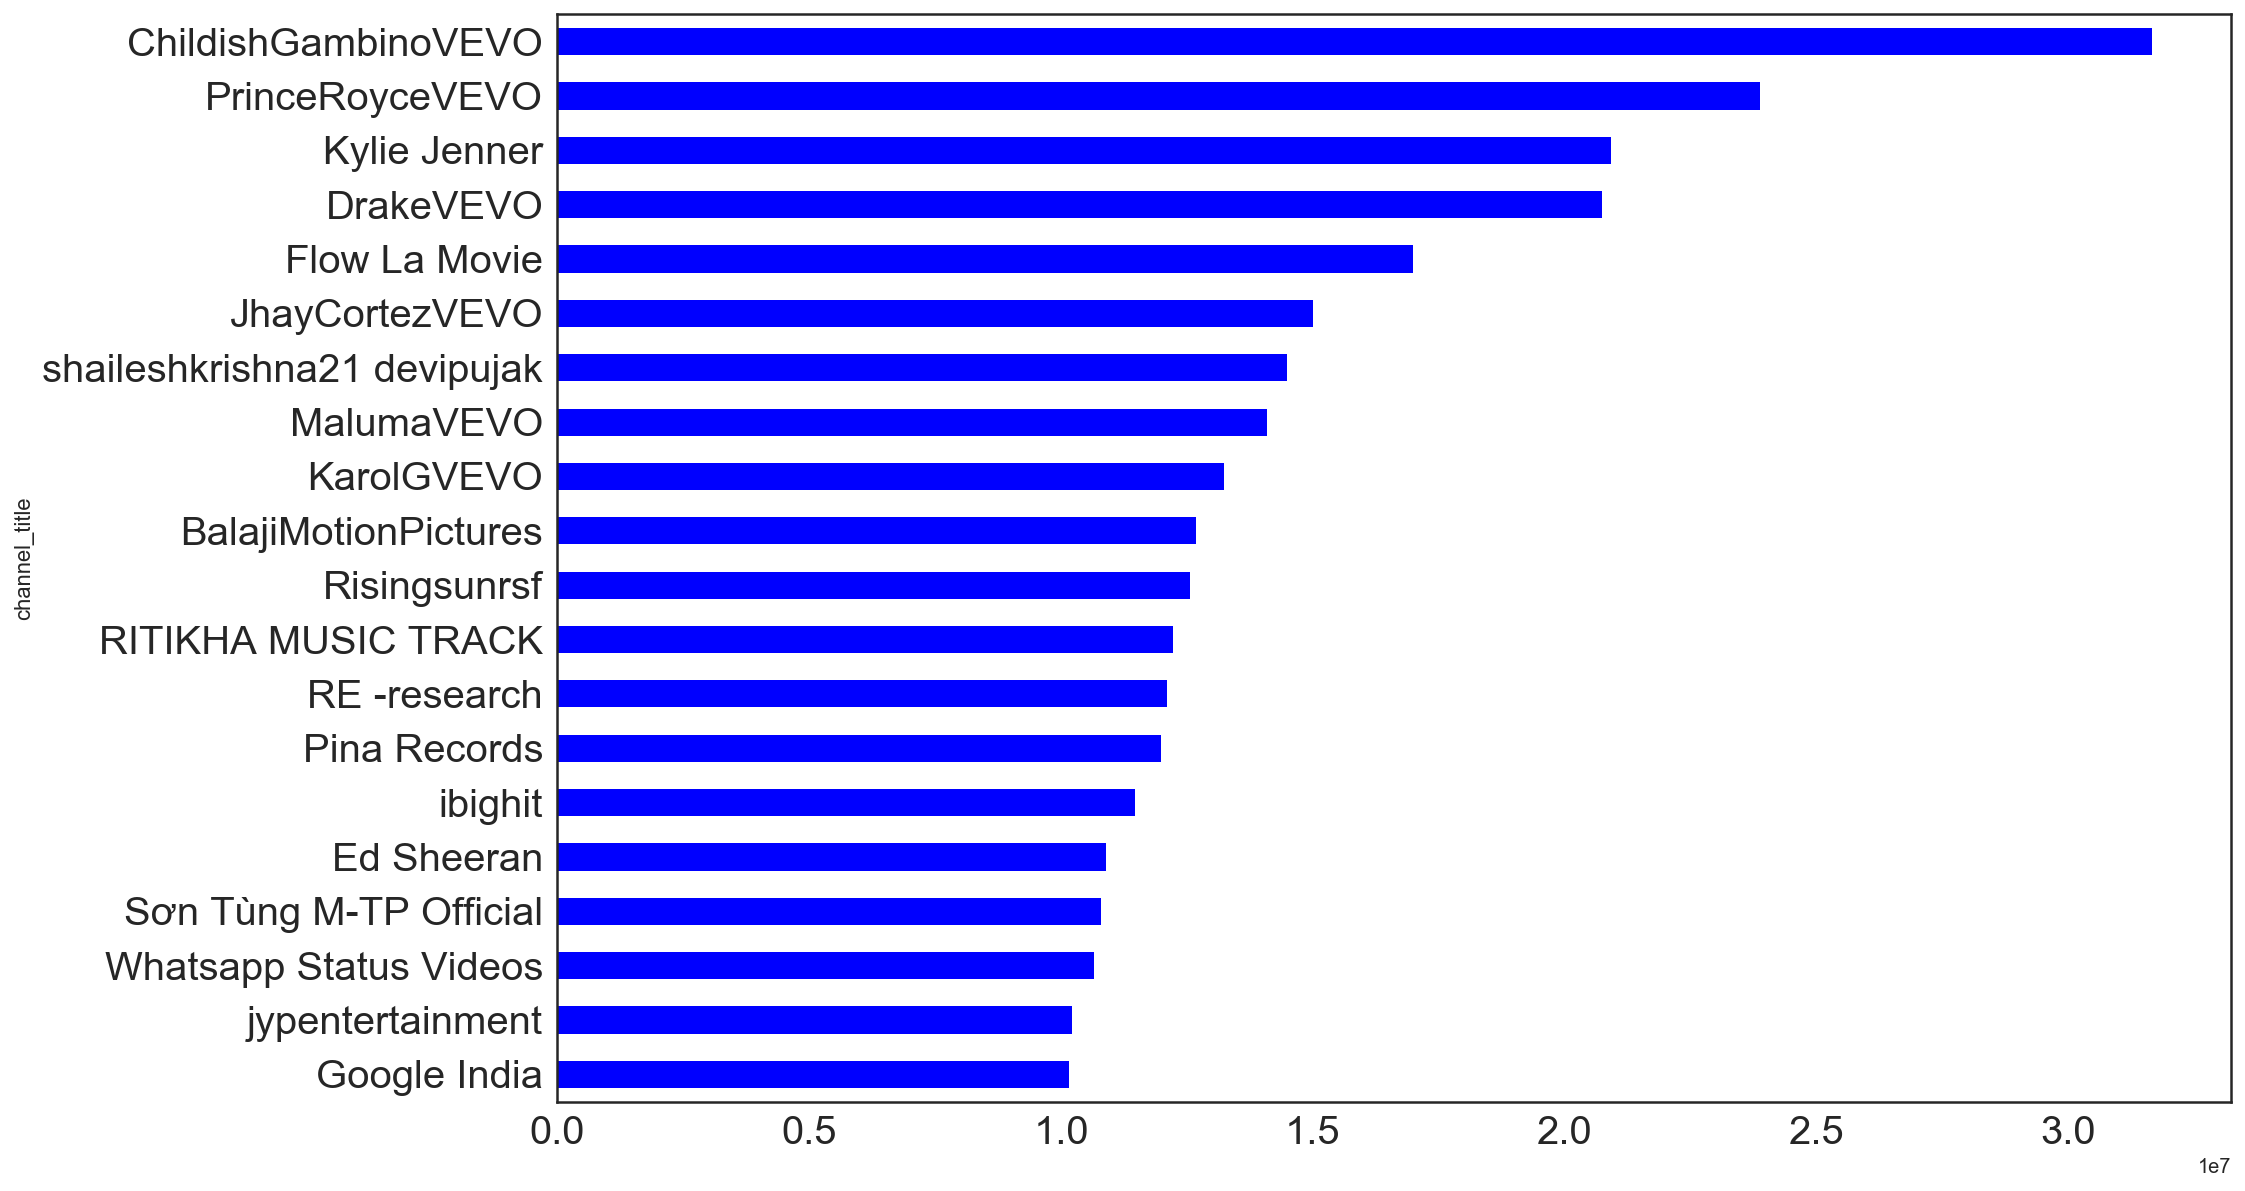

In [108]:
#top 20 channels by the mean of views

fig = plt.figure(figsize=(15, 10))
three_countries.groupby('channel_title').mean().sort_values(by=['views'], ascending=False)[:20].views.sort_values(ascending=True).plot(kind='barh',colormap='winter',fontsize=20)

In [109]:
#among popular videos, here are top 10 like percentage video. All of them are k-pop stars MV lol 

three_countries.loc[three_countries.popular==1].sort_values(by=['like_percentage'])

video_id trending_date  \
7116   LFhT6H6pRWg      17.19.12   
6201   8d_202l55LU      17.15.12   
19425  Aqx41JrNTSw      18.21.02   
19376  V5cOvyDpWfM      18.21.02   
16194  C-rumHvmqCA      18.05.02   
...            ...           ...   
19367  qTvrzXELn-k      18.01.03   
22787  iABlo-V031k      18.21.03   
24515  N-f-iS-PHIA      18.31.03   
26013  rucOLpxX6WE      18.14.04   
27304  m0xho2iwTGE      18.21.04   

                                                   title        channel_title  \
7116               PSA from Chairman of the FCC Ajit Pai         Daily Caller   
6201            The FCC repeals its net neutrality rules      Washington Post   
19425  김보름 진심으로 사과드립니다..결국 눈물로 사죄 (기자회견 풀영상) / SBS / ...               SBS 뉴스   
19376  Fergie Performs The U.S. National Anthem / 201...       MLG Highlights   
16194          T-Mobile | #LittleOnes | 2018 Big Game Ad             T-Mobile   
...                                                  ...                  ...   
19367  తల్లి పార్థివదేహం దగ్గర శ్రీదేవి కూతురు చేసిన ...         9Roses Media   
22787  சற்று முன் சசிகலா - கணவர் நடராஜனின்   உடலைப் ப...  Thirty Seconds News   
24515  Kathi Mahesh Review on Rangasthalam Movie | Ta...    YOYO Cine Talkies   
26013  Sri Reddy gets emotional seeing mother's inter...           TV9 Telugu   
27304  Pawan Kalyan at Film Chamber over comments on ...           TV9 Telugu   

       category_id              publish_time  \
7116            22 2017-12-13 22:52:57+00:00   
6201            25 2017-12-14 18:49:06+00:00   
19425           25 2018-02-20 09:33:31+00:00   
19376           17 2018-02-19 01:37:11+00:00   
16194           24 2018-02-05 02:12:26+00:00   
...            ...                       ...   
19367           24 2018-02-27 17:09:40+00:00   
22787           22 2018-03-20 10:31:56+00:00   
24515           24 2018-03-30 06:18:07+00:00   
26013           25 2018-04-11 14:45:55+00:00   
27304           25 2018-04-20 17:09:49+00:00   

                                                    tags     views  likes  \
7116   thedc|"dc"|"washington dc"|"washington"|"the d...   1142585   9100   
6201   fcc net neutrality|"breaking news video"|"vide...    985179   4870   
19425  뉴스|"NEWS"|"news"|"SBS"|"sbs"|"SBS NEWS"|"SBS8N...   1337500   2200   
19376  mlg highlights|"mlg"|"basketball"|"highlights"...  14647590  32892   
16194  best super bowl ads|"best superbowl ads"|"best...   1687984   1700   
...                                                  ...       ...    ...   
19367  #9RosesMedia|"శ్రీదేవి కూతురు"|"Sridevi Daught...    900492      0   
22787  sasikala|"sasikala husband"|"ajith"|"vijay"|"v...    907048      0   
24515  rangasthalam movie|"rangasthalam review"|"rang...   1086829      0   
26013  tv9|"tv9 live"|"tv9 news"|"live tv9"|"tv9 telu...   2769089      0   
27304  tv9|"tv9 live"|"tv9 news"|"live tv9"|"tv9 telu...   1666064      0   

       dislikes  comment_count  \
7116     218841          28013   
6201     110707          19843   
19425      8092          14673   
19376    117128          44404   
16194      5735              0   
...         ...            ...   
19367         0              0   
22787         0            182   
24515         0              0   
26013         0              0   
27304         0            102   

                                       thumbnail_link  comments_disabled  \
7116   https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg              False   
6201   https://i.ytimg.com/vi/8d_202l55LU/default.jpg              False   
19425  https://i.ytimg.com/vi/Aqx41JrNTSw/default.jpg              False   
19376  https://i.ytimg.com/vi/V5cOvyDpWfM/default.jpg              False   
16194  https://i.ytimg.com/vi/C-rumHvmqCA/default.jpg               True   
...                                               ...                ...   
19367  https://i.ytimg.com/vi/qTvrzXELn-k/default.jpg               True   
22787  https://i.ytimg.com/vi/iABlo-V031k/default.jpg              False   
24515  ht

In [110]:
#among popular videos, here are top 10 dislike percentage video. 

three_countries.loc[three_countries.popular==1].sort_values(by=['like_percentage'], ascending='True')

video_id trending_date  \
7116   LFhT6H6pRWg      17.19.12   
6201   8d_202l55LU      17.15.12   
19425  Aqx41JrNTSw      18.21.02   
19376  V5cOvyDpWfM      18.21.02   
16194  C-rumHvmqCA      18.05.02   
...            ...           ...   
19367  qTvrzXELn-k      18.01.03   
22787  iABlo-V031k      18.21.03   
24515  N-f-iS-PHIA      18.31.03   
26013  rucOLpxX6WE      18.14.04   
27304  m0xho2iwTGE      18.21.04   

                                                   title        channel_title  \
7116               PSA from Chairman of the FCC Ajit Pai         Daily Caller   
6201            The FCC repeals its net neutrality rules      Washington Post   
19425  김보름 진심으로 사과드립니다..결국 눈물로 사죄 (기자회견 풀영상) / SBS / ...               SBS 뉴스   
19376  Fergie Performs The U.S. National Anthem / 201...       MLG Highlights   
16194          T-Mobile | #LittleOnes | 2018 Big Game Ad             T-Mobile   
...                                                  ...                  ...   
19367  తల్లి పార్థివదేహం దగ్గర శ్రీదేవి కూతురు చేసిన ...         9Roses Media   
22787  சற்று முன் சசிகலா - கணவர் நடராஜனின்   உடலைப் ப...  Thirty Seconds News   
24515  Kathi Mahesh Review on Rangasthalam Movie | Ta...    YOYO Cine Talkies   
26013  Sri Reddy gets emotional seeing mother's inter...           TV9 Telugu   
27304  Pawan Kalyan at Film Chamber over comments on ...           TV9 Telugu   

       category_id              publish_time  \
7116            22 2017-12-13 22:52:57+00:00   
6201            25 2017-12-14 18:49:06+00:00   
19425           25 2018-02-20 09:33:31+00:00   
19376           17 2018-02-19 01:37:11+00:00   
16194           24 2018-02-05 02:12:26+00:00   
...            ...                       ...   
19367           24 2018-02-27 17:09:40+00:00   
22787           22 2018-03-20 10:31:56+00:00   
24515           24 2018-03-30 06:18:07+00:00   
26013           25 2018-04-11 14:45:55+00:00   
27304           25 2018-04-20 17:09:49+00:00   

                                                    tags     views  likes  \
7116   thedc|"dc"|"washington dc"|"washington"|"the d...   1142585   9100   
6201   fcc net neutrality|"breaking news video"|"vide...    985179   4870   
19425  뉴스|"NEWS"|"news"|"SBS"|"sbs"|"SBS NEWS"|"SBS8N...   1337500   2200   
19376  mlg highlights|"mlg"|"basketball"|"highlights"...  14647590  32892   
16194  best super bowl ads|"best superbowl ads"|"best...   1687984   1700   
...                                                  ...       ...    ...   
19367  #9RosesMedia|"శ్రీదేవి కూతురు"|"Sridevi Daught...    900492      0   
22787  sasikala|"sasikala husband"|"ajith"|"vijay"|"v...    907048      0   
24515  rangasthalam movie|"rangasthalam review"|"rang...   1086829      0   
26013  tv9|"tv9 live"|"tv9 news"|"live tv9"|"tv9 telu...   2769089      0   
27304  tv9|"tv9 live"|"tv9 news"|"live tv9"|"tv9 telu...   1666064      0   

       dislikes  comment_count  \
7116     218841          28013   
6201     110707          19843   
19425      8092          14673   
19376    117128          44404   
16194      5735              0   
...         ...            ...   
19367         0              0   
22787         0            182   
24515         0              0   
26013         0              0   
27304         0            102   

                                       thumbnail_link  comments_disabled  \
7116   https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg              False   
6201   https://i.ytimg.com/vi/8d_202l55LU/default.jpg              False   
19425  https://i.ytimg.com/vi/Aqx41JrNTSw/default.jpg              False   
19376  https://i.ytimg.com/vi/V5cOvyDpWfM/default.jpg              False   
16194  https://i.ytimg.com/vi/C-rumHvmqCA/default.jpg               True   
...                                               ...                ...   
19367  https://i.ytimg.com/vi/qTvrzXELn-k/default.jpg               True   
22787  https://i.ytimg.com/vi/iABlo-V031k/default.jpg              False   
24515  ht

In [114]:
#simple example
import nltk
# spaCy based imports
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from spacy.lang.en.examples import sentences 



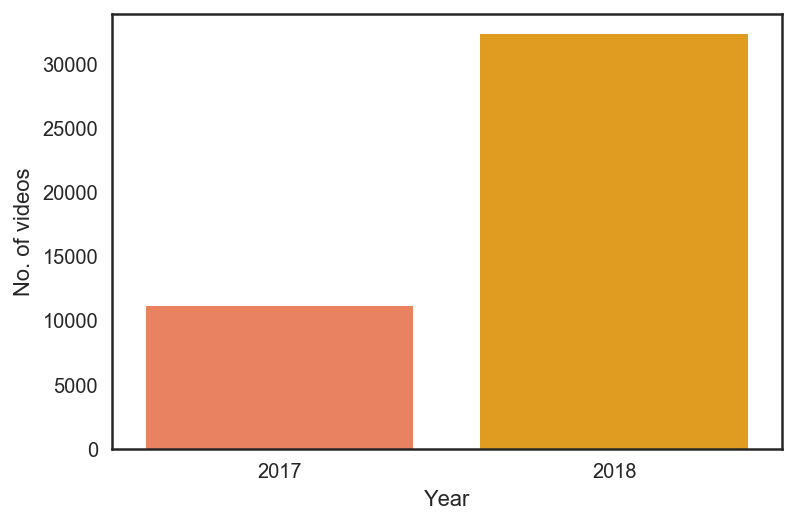

In [115]:
cdf = three_countries["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [116]:
three_countries["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018    0.744031
2017    0.255969
Name: trending_date, dtype: float64

In [117]:
#We can see that the dataset was collected in 2017 and 2018 with 74% of it in 2018 and 25% in 2017.

In [118]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [119]:
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

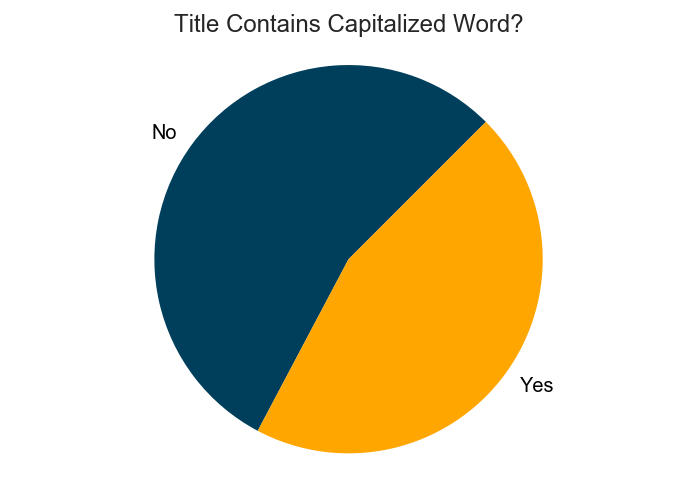

In [120]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


three_countries["contains_capitalized"] = three_countries["title"].apply(contains_capitalized_word)

value_counts = three_countries["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [121]:
three_countries["contains_capitalized"].value_counts(normalize=True)

False    0.547556
True     0.452444
Name: contains_capitalized, dtype: float64

In [122]:
from matplotlib import colors as PLOT_COLORS

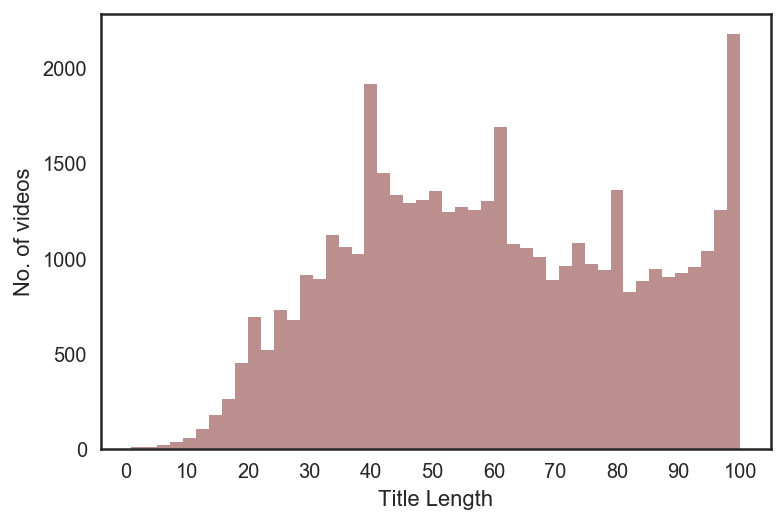

In [123]:
three_countries["title_length"] = three_countries["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(three_countries["title_length"], kde=False, rug=False, 
                 color='rosybrown', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

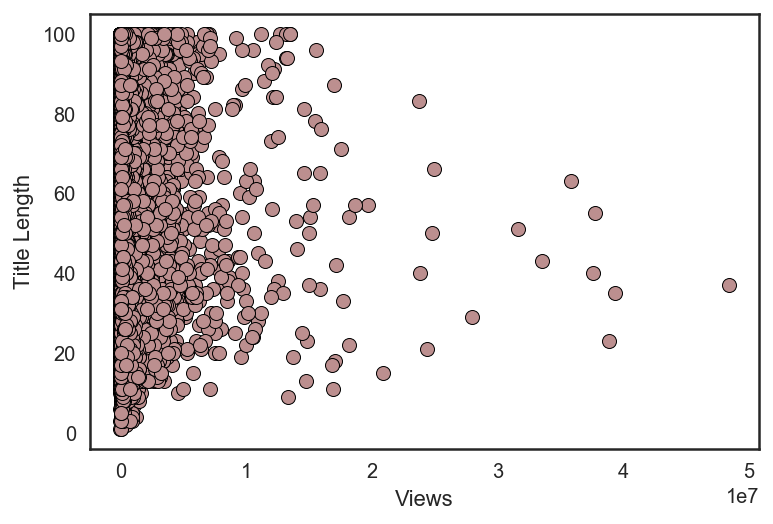

In [124]:
fig, ax = plt.subplots()
_ = ax.scatter(x=three_countries['views'], y=three_countries['title_length'], color='rosybrown', edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")


In [125]:
three_countries.corr()

category_id     views     likes  dislikes  \
category_id                1.000000 -0.113707 -0.104808 -0.027244   
views                     -0.113707  1.000000  0.705870  0.410213   
likes                     -0.104808  0.705870  1.000000  0.394431   
dislikes                  -0.027244  0.410213  0.394431  1.000000   
comment_count             -0.042073  0.505964  0.762139  0.619406   
comments_disabled          0.047038 -0.015521 -0.030671 -0.004449   
ratings_disabled           0.047170 -0.020956 -0.031261 -0.014869   
video_error_or_removed    -0.010593  0.014449  0.003768  0.001642   
popular                   -0.108197  0.563511  0.415435  0.204725   
like_percentage           -0.106726  0.049169  0.128581 -0.075530   
contains_capitalized      -0.020556  0.019603  0.035677  0.001047   
title_length              -0.019137 -0.041855 -0.126647 -0.035025   

                        comment_count  comments_disabled  ratings_disabled  \
category_id                 -0.042073           0.047038          0.047170   
views                        0.505964          -0.015521         -0.020956   
likes                        0.762139          -0.030671         -0.031261   
dislikes                     0.619406          -0.004449         -0.014869   
comment_count                1.000000          -0.030184         -0.020194   
comments_disabled           -0.030184           1.000000          0.312237   
ratings_disabled            -0.020194           0.312237          1.000000   
video_error_or_removed       0.001486          -0.002828         -0.002217   
popular                      0.276344          -0.017554         -0.025962   
like_percentage              0.059379          -0.142121               NaN   
contains_capitalized         0.043173          -0.026498         -0.010900   
title_length                -0.092689           0.077419          0.047966   

                        video_error_or_removed   popular  like_percentage  \
category_id                          -0.010593 -0.108197        -0.106726   
views                                 0.014449  0.563511         0.049169   
likes                                 0.003768  0.415435         0.128581   
dislikes                              0.001642  0.204725        -0.075530   
comment_count                         0.001486  0.276344         0.059379   
comments_disabled                    -0.002828 -0.017554        -0.142121   
ratings_disabled                     -0.002217 -0.025962              NaN   
video_error_or_removed                1.000000  0.006419         0.000332   
popular                               0.006419  1.000000         0.068336   
like_percentage                       0.000332  0.068336         1.000000   
contains_capitalized                 -0.014420  0.038684         0.081020   
title_length                         -0.026617 -0.029359        -0.194631   

                        contains_capitalized  title_length  
category_id                        -0.020556     -0.019137  
views                               0.019603     -0.041855  
likes                               0.035677     -0.126647  
dislikes                            0.001047     -0.035025  
comment_count                       0.043173     -0.092689  
comments_disabled                  -0.026498      0.077419  
ratings_disabled                   -0.010900      0.047966  
video_error_or_removed             -0.014420     -0.026617  
popular                             0.038684     -0.029359  
like_percentage                     0.081020     -0.194631  
contains_capitalized                1.000000      0.055826  
title_length                        0.055826      1.000000

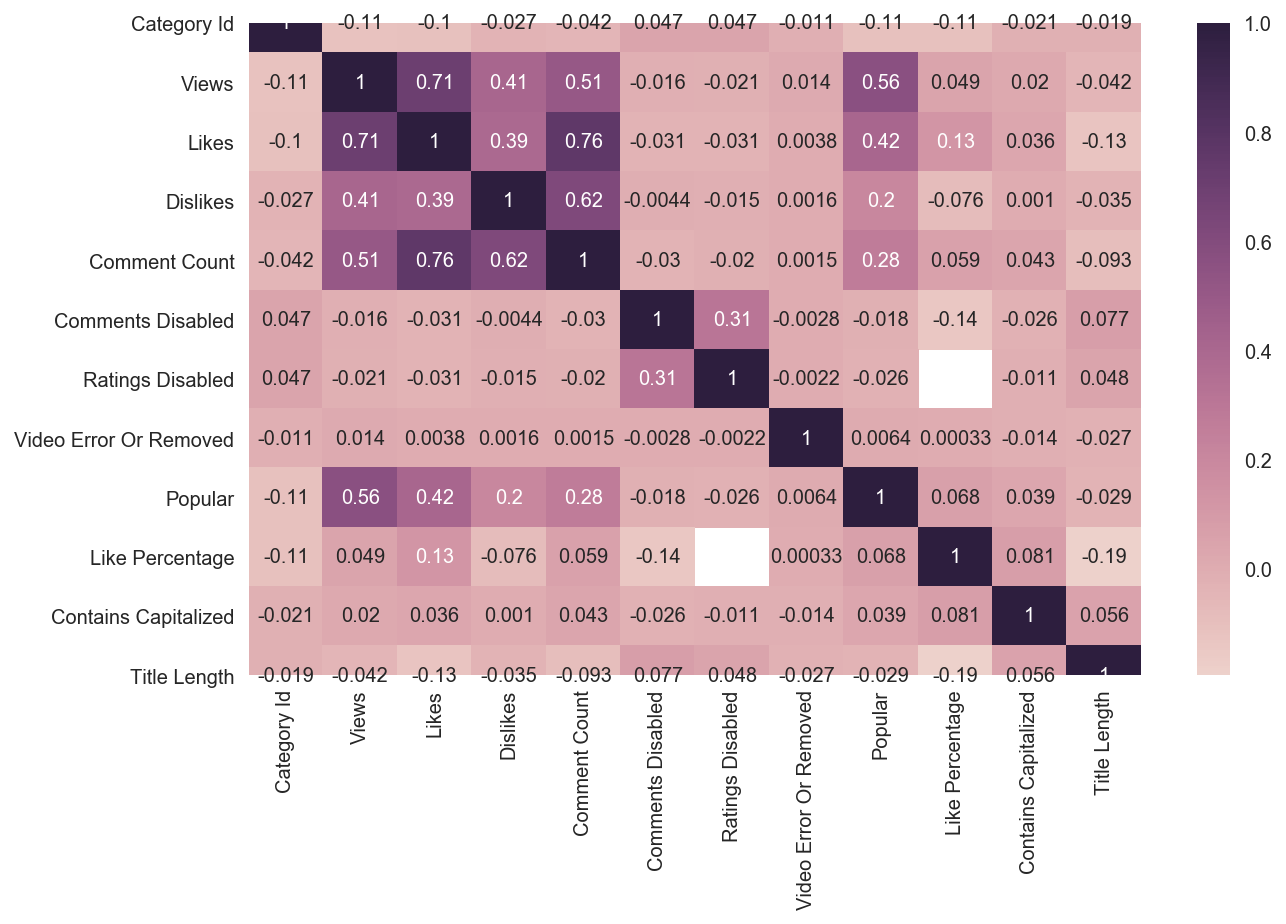

In [126]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(three_countries.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(three_countries.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [127]:
title_words = list(three_countries["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 24078),
 ('-', 16276),
 ('2018', 5904),
 ('The', 4281),
 ('Episode', 3978),
 ('&', 2215),
 ('to', 2012),
 ('the', 1974),
 ('2017', 1797),
 ('in', 1795),
 ('||', 1764),
 ('of', 1601),
 ('and', 1577),
 ('Full', 1519),
 ('on', 1428),
 ('A', 1223),
 ('News', 1208),
 ('with', 1168),
 ('To', 1166),
 ('a', 1074),
 ('2', 1064),
 ('I', 1044),
 ('vs', 993),
 ('New', 986),
 ('With', 916)]

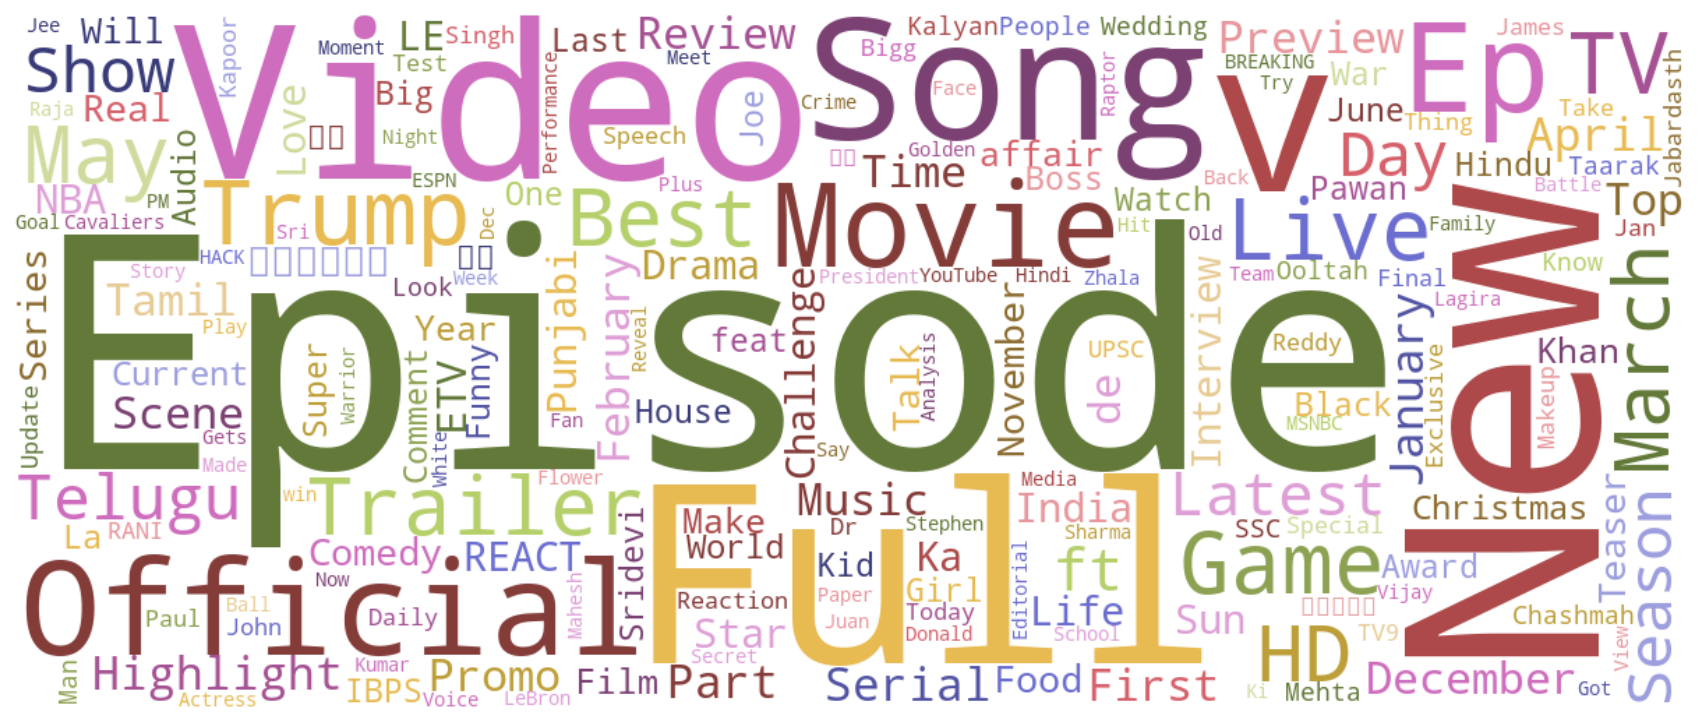

In [128]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")


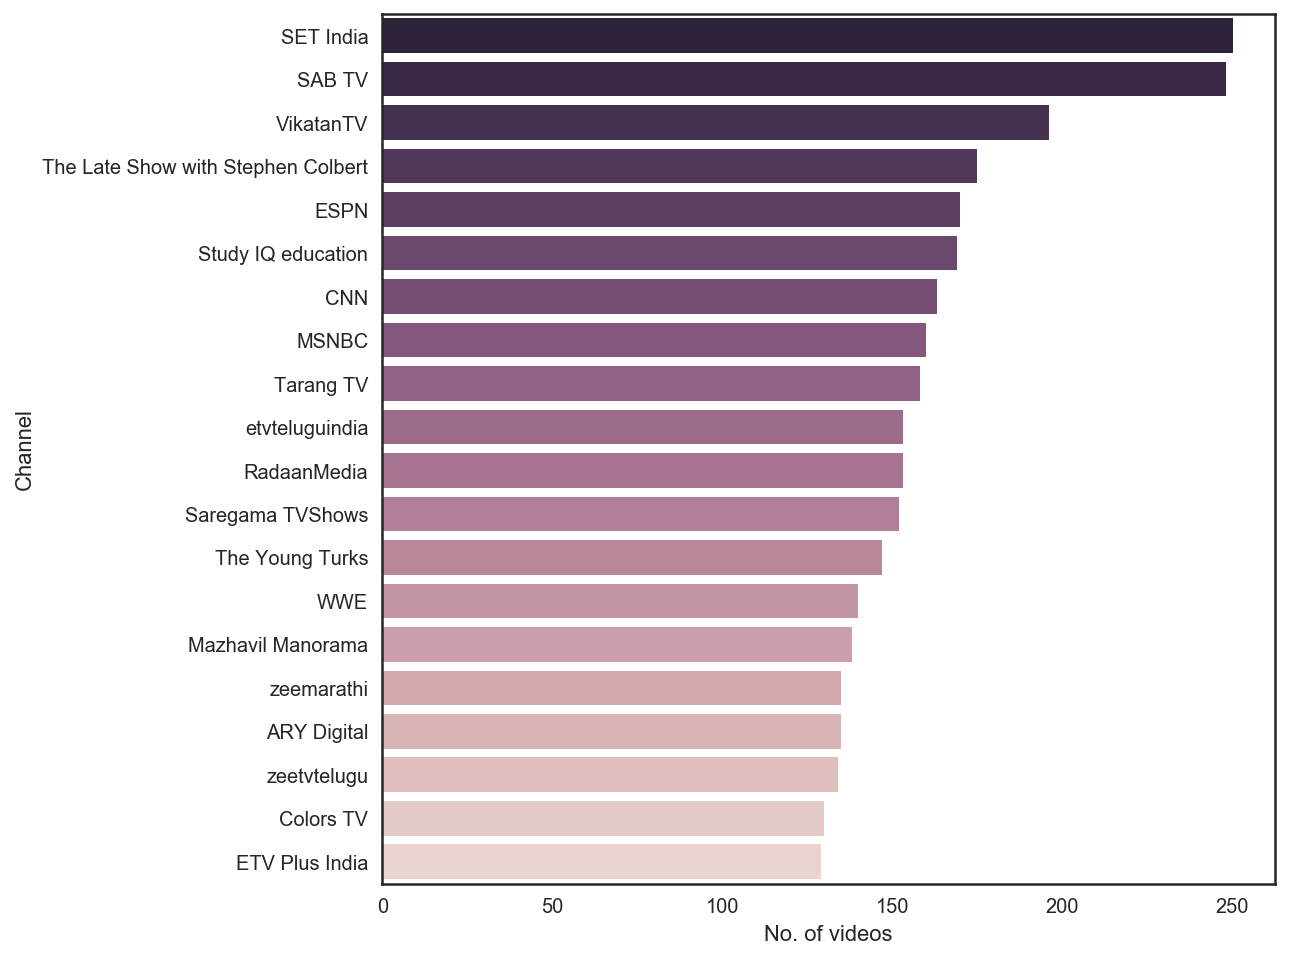

In [129]:
cdf = three_countries.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [150]:
# importing a new file

In [151]:
y_tube=pd.read_csv(r'C:\Users\prave\Downloads\youtube-new\USvideos.csv')

In [152]:
y_tube.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [153]:
## No.of columns present

y_tube.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [154]:
y_tube.index

RangeIndex(start=0, stop=40949, step=1)

In [155]:
#Shape command gives the number of collumns and rows
y_tube.shape

(40949, 16)

In [156]:
##Gives an idea about how many unique values are present
y_tube.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [157]:
#Gives information about the dataframe columns
y_tube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [158]:
# Reframming  the date and time columns
y_tube['publish_time'] = pd.to_datetime(y_tube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
y_tube['trending_date']=pd.to_datetime(y_tube['trending_date'],format='%y.%d.%m')

# Trying to remove the unknown values wihch are shown as 0 in view_count, likes, dislikes, and comment_count
missing=y_tube.loc[(y_tube['views'] ==0) | (y_tube['likes'] ==0)|(y_tube['dislikes'] ==0)|(y_tube['comment_count'] ==0)]
y_tube.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id        publish_time  \
0           22 2017-11-13 17:13:01   
1           24 2017-11-13 07:30:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-13 11:00:04   
4           24 2017-11-12 18:01:41   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [159]:
##convert the boolean true or false to int 0 and 1

In [160]:
y_tube['comments_disabled']=y_tube['comments_disabled'].astype(int)

In [161]:
y_tube['ratings_disabled']=y_tube['ratings_disabled'].astype(int)

In [162]:
y_tube['video_error_or_removed']=y_tube['video_error_or_removed'].astype(int)

In [163]:
y_tube.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id        publish_time  \
0           22 2017-11-13 17:13:01   
1           24 2017-11-13 07:30:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-13 11:00:04   
4           24 2017-11-12 18:01:41   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0                  0                 0                       0   
1                  0                 0                       0   
2                  0                 0                       0   
3                  0                 0                       0   
4                  0                 0                       0   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [164]:
## as description is related to each video and videos can trend for more than one day it can have duplicates

In [165]:
y_tube.duplicated('description')

0        False
1        False
2        False
3        False
4        False
         ...  
40944     True
40945     True
40946     True
40947     True
40948     True
Length: 40949, dtype: bool

In [166]:
##video_id is created for videos which are trending, and this can be trending for more than two days so few video_id are duplicates but necessary for youtube trending analysis

In [167]:
y_tube.duplicated('video_id')

0        False
1        False
2        False
3        False
4        False
         ...  
40944     True
40945     True
40946     True
40947     True
40948     True
Length: 40949, dtype: bool

In [168]:
y_tube

video_id trending_date  \
0      2kyS6SvSYSE    2017-11-14   
1      1ZAPwfrtAFY    2017-11-14   
2      5qpjK5DgCt4    2017-11-14   
3      puqaWrEC7tY    2017-11-14   
4      d380meD0W0M    2017-11-14   
...            ...           ...   
40944  BZt0qjTWNhw    2018-06-14   
40945  1h7KV2sjUWY    2018-06-14   
40946  D6Oy4LfoqsU    2018-06-14   
40947  oV0zkMe1K8s    2018-06-14   
40948  ooyjaVdt-jA    2018-06-14   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id        publish_time  \
0                  CaseyNeistat           22 2017-11-13 17:13:01   
1               LastWeekTonight           24 2017-11-13 07:30:00   
2                  Rudy Mancuso           23 2017-11-12 19:05:24   
3         Good Mythical Morning           24 2017-11-13 11:00:04   
4                      nigahiga           24 2017-11-12 18:01:41   
...                         ...          ...                 ...   
40944             AaronsAnimals           15 2018-05-18 13:00:04   
40945                  zefrank1           22 2018-05-18 01:00:06   
40946                Brad Mondo           24 2018-05-18 17:34:22   
40947  How It Should Have Ended            1 2018-05-17 17:00:04   
40948              Call of Duty           20 2018-05-17 17:09:38   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg                  0   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg                  0   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg                  0   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg                  0   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg                  0   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg                  0   
40945  https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg                  0   
40946  ht

In [169]:
#Checking for null or NAN values


In [170]:
y_tube.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [171]:
##creating a new column category name and alloting variables to the category_id column

In [172]:
y_tube['category_name'] = np.nan
y_tube.loc[(y_tube['category_id'] == 1),"category_name"] = 'Film and Animation'
y_tube.loc[(y_tube['category_id'] == 2),"category_name"] = 'Cars and Vehicles'
y_tube.loc[(y_tube['category_id'] == 10),"category_name"] = 'Music'
y_tube.loc[(y_tube['category_id'] == 15),"category_name"] = 'Pets and Animals'
y_tube.loc[(y_tube["category_id"] == 17),"category_name"] = 'Sport'
y_tube.loc[(y_tube["category_id"] == 19),"category_name"] = 'Travel and Events'
y_tube.loc[(y_tube["category_id"] == 20),"category_name"] = 'Gaming'
y_tube.loc[(y_tube["category_id"] == 22),"category_name"] = 'People and Blogs'
y_tube.loc[(y_tube["category_id"] == 23),"category_name"] = 'Comedy'
y_tube.loc[(y_tube["category_id"] == 24),"category_name"] = 'Entertainment'
y_tube.loc[(y_tube["category_id"] == 25),"category_name"] = 'News and Politics'
y_tube.loc[(y_tube["category_id"] == 26),"category_name"] = 'How to and Style'
y_tube.loc[(y_tube["category_id"] == 27),"category_name"] = 'Education'
y_tube.loc[(y_tube["category_id"] == 28),"category_name"] = 'Science and Technology'
y_tube.loc[(y_tube["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
y_tube.loc[(y_tube["category_id"] == 25),"category_name"] = 'News & Politics'

In [173]:
# Checking info about dataframe after adding new column and changing publish date and trending time data type

In [174]:
y_tube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
video_id                  40949 non-null object
trending_date             40949 non-null datetime64[ns]
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null datetime64[ns]
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null int32
ratings_disabled          40949 non-null int32
video_error_or_removed    40949 non-null int32
description               40379 non-null object
category_name             40892 non-null object
dtypes: datetime64[ns](2), int32(3), int64(5), object(7)
memory usa

In [175]:
esVLD = smf.ols('views ~ likes + dislikes', y_tube).fit()
esVLD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                 5.586e+04
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        01:24:27   Log-Likelihood:            -6.7882e+05
No. Observations:               40949   AIC:                         1.358e+06
Df Residuals:                   40946   BIC:                         1.358e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.382e+05   1.99e+04     16.996      0.000    2.99e+05    3.77e+05
likes         25.7627      0.092    278.704      0.000      25.582      25.944
dislikes      29.4412      0.729     40.395      0.000      28.013      30.870
==============================================================================
Omnibus:                    36646.964   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23719719.716
Skew:                           3.299   Prob(JB):                         0.00
Kurtosis:                     120.722   Cond. No.                     2.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
##reformating likes views,comment_count and dislikes column using logarithm function
#checking for normal distribution

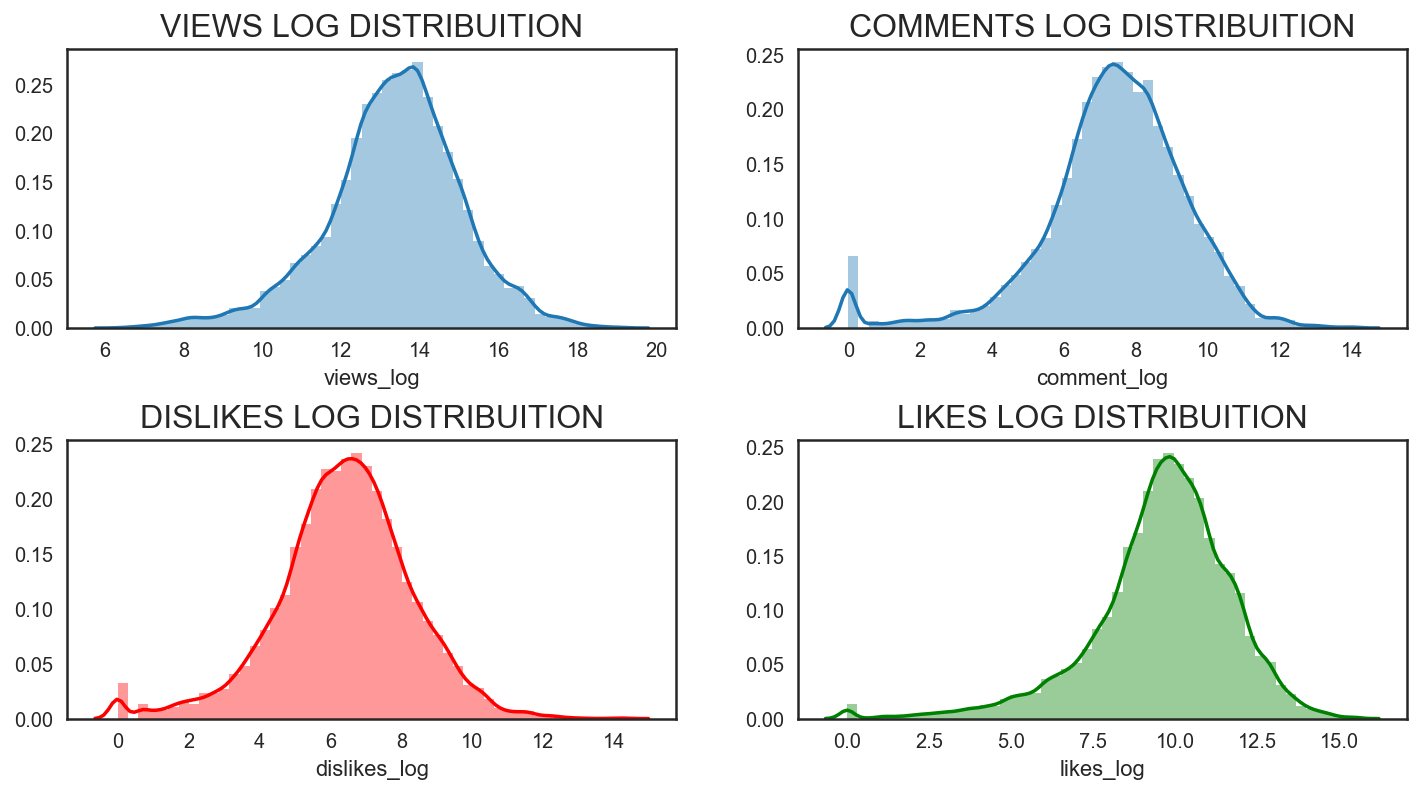

In [177]:
y_tube['likes_log'] = np.log(y_tube['likes'] + 1)
y_tube['views_log'] = np.log(y_tube['views'] + 1)
y_tube['dislikes_log'] = np.log(y_tube['dislikes'] + 1)
y_tube['comment_log'] = np.log(y_tube['comment_count'] + 1)

plt.figure(figsize = (12,6))
plt.subplot(221)
g1 = sns.distplot(y_tube['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(y_tube['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(y_tube['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(y_tube['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)




plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

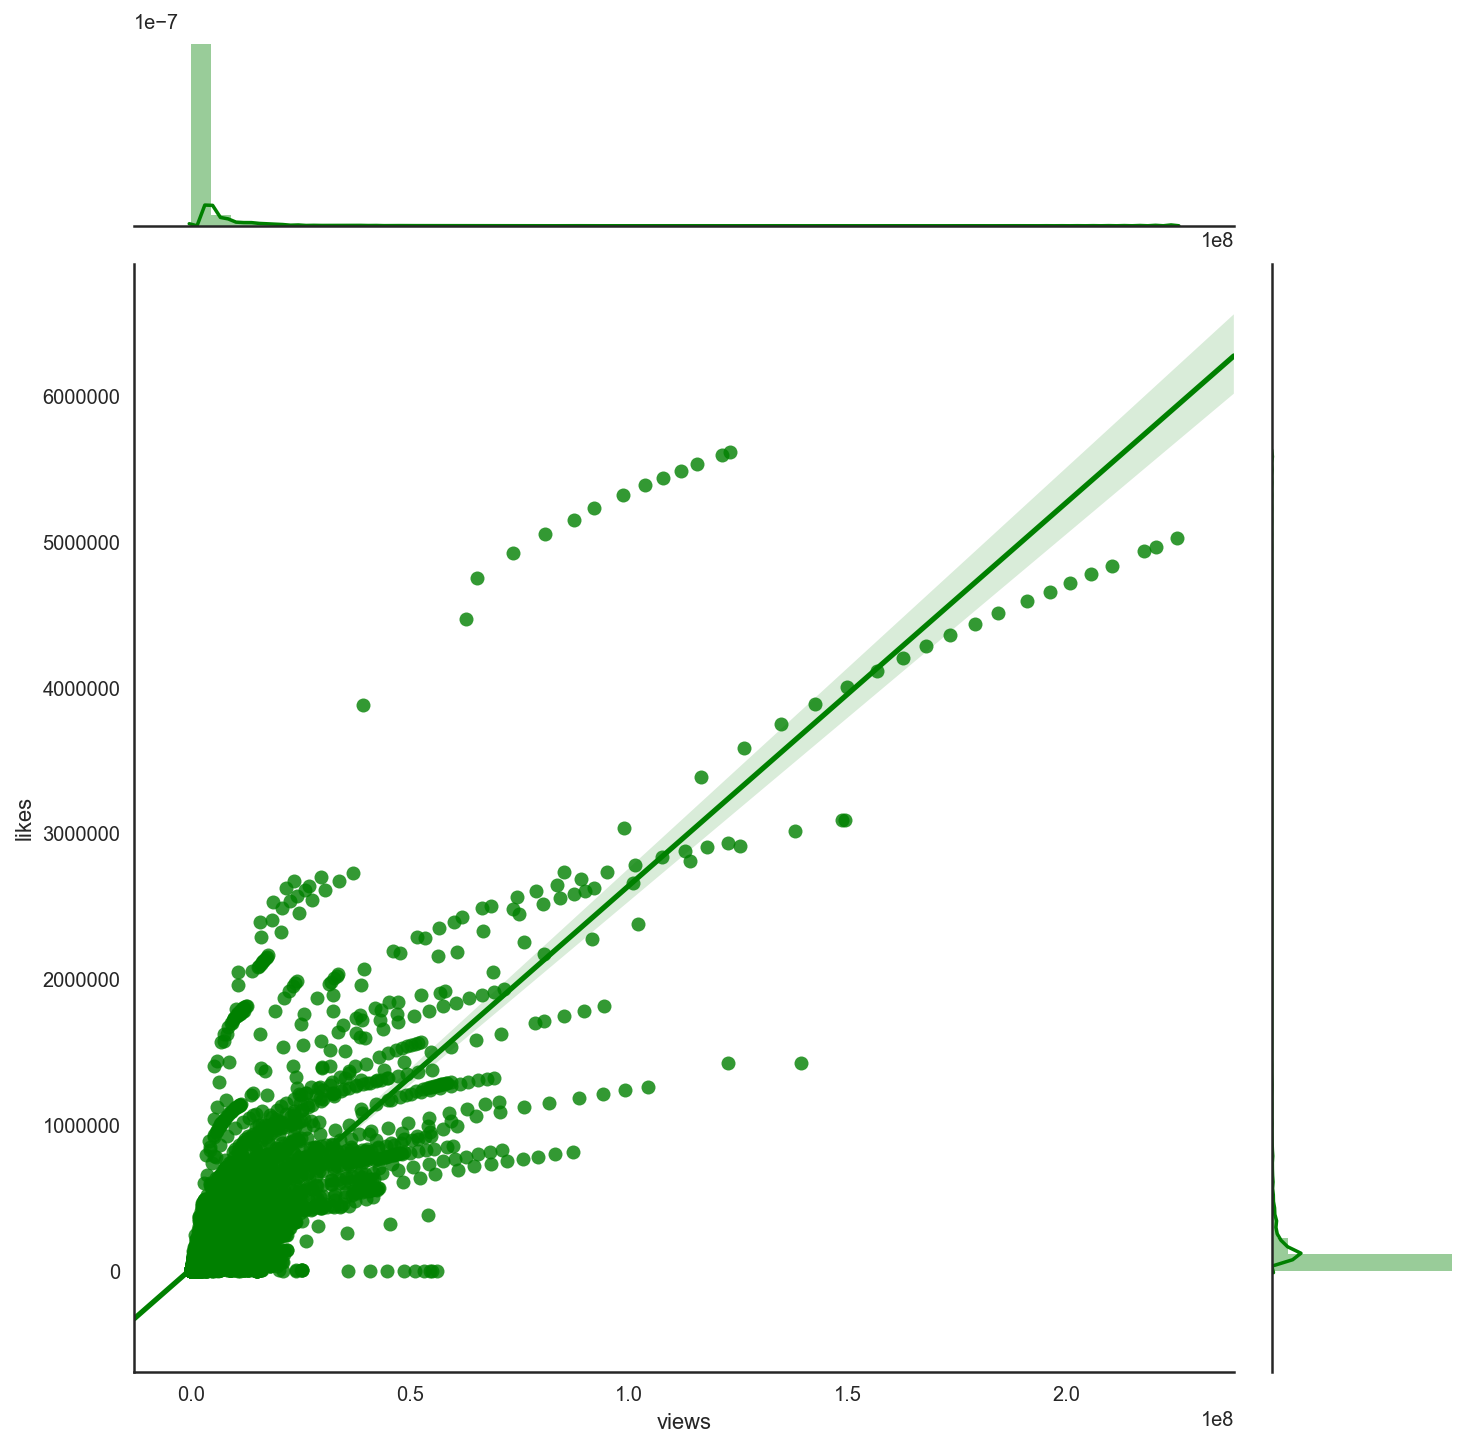

In [178]:
sns.jointplot(x='views', y='likes', 
              data=y_tube, color ='green', kind ='reg', 
              height = 10.0)
plt.show()

In [179]:
## Finding quantiles for the views,likes,dislikes and comment_count

In [180]:
print(y_tube['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(y_tube['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(y_tube['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(y_tube['comment_count'].quantile([.01,.25,.5,.75,.99]))


0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64

Likes quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64


In [181]:
y_tube.sort_values(by='views_log',ascending=False)
y_tube.head()

video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id        publish_time  \
0           22 2017-11-13 17:13:01   
1           24 2017-11-13 07:30:00   
2           23 2017-11-12 19:05:24   
3           24 2017-11-13 11:00:04   
4           24 2017-11-12 18:01:41   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  ...                                  thumbnail_link  \
0      2966  ...  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146  ...  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666  ...  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0                 0                 0                       0   
1                 0                 0                       0   
2                 0                 0                       0   
3                 0                 0                       0   
4                 0                 0                       0   

                                         description     category_name  \
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  People and Blogs   
1  One year after the presidential election, John...     Entertainment   
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...            Comedy   
3  Today we find out if Link is a Nickelback amat...     Entertainment   
4  I know it's been a while since we did this sho...     Entertainment   

   likes_log  views_log  dislikes_log  comment_log  
0  10.960027  13.525659      7.995307     9.677528  
1  11.484382  14.698775      8.723719     9.449672  
2  11.891595  14.975981      8.582981     9.009692  
3   9.227492  12.745978      6.502790     7.671827  
4  11.792343  14.555413      7.595890     9.771041  

[5 rows x 21 columns]

In [183]:
y_tube_top = y_tube.nlargest(50, 'views_log')

In [184]:
y_tube_top.head()

video_id trending_date  \
38547  VYOjWnS4cMY    2018-06-02   
38345  VYOjWnS4cMY    2018-06-01   
38146  VYOjWnS4cMY    2018-05-31   
37935  VYOjWnS4cMY    2018-05-30   
37730  VYOjWnS4cMY    2018-05-29   

                                                   title        channel_title  \
38547  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
38345  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
38146  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37935  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   
37730  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   

       category_id        publish_time  \
38547           10 2018-05-06 04:00:07   
38345           10 2018-05-06 04:00:07   
38146           10 2018-05-06 04:00:07   
37935           10 2018-05-06 04:00:07   
37730           10 2018-05-06 04:00:07   

                                                    tags      views    likes  \
38547  Childish Gambino|"Rap"|"This Is America"|"mcDJ...  225211923  5023450   
38345  Childish Gambino|"Rap"|"This Is America"|"mcDJ...  220490543  4962403   
38146  Childish Gambino|"Rap"|"This Is America"|"mcDJ...  217750076  4934188   
37935  Childish Gambino|"Rap"|"This Is America"|"mcDJ...  210338856  4836448   
37730  Childish Gambino|"Rap"|"This Is America"|"mcDJ...  205643016  4776680   

       dislikes  ...                                  thumbnail_link  \
38547    343541  ...  https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg   
38345    338105  ...  https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg   
38146    335462  ...  https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg   
37935    326902  ...  https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg   
37730    321493  ...  https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
38547                 0                 0                       0   
38345                 0                 0                       0   
38146                 0                 0                       0   
37935                 0                 0                       0   
37730                 0                 0                       0   

                                             description category_name  \
38547  “This is America” by Childish Gambino http://s...         Music   
38345  “This is America” by Childish Gambino http://s...         Music   
38146  “This is America” by Childish Gambino http://s...         Music   
37935  “This is America” by Childish Gambino http://s...         Music   
37730  “This is America” by Childish Gambino http://s...         Music   

       likes_log  views_log  dislikes_log  comment_log  
38547  15.429628  19.232552     12.747065    13.156249  
38345  15.417401  19.211365     12.731115    13.146740  
38146  15.411699  19.198859     12.723267    13.141774  
37935  15.391691  19.164230     12.697419    13.125803  
37730  15.379257  19.141652     12.680734    13.114759  

[5 rows x 21 columns]

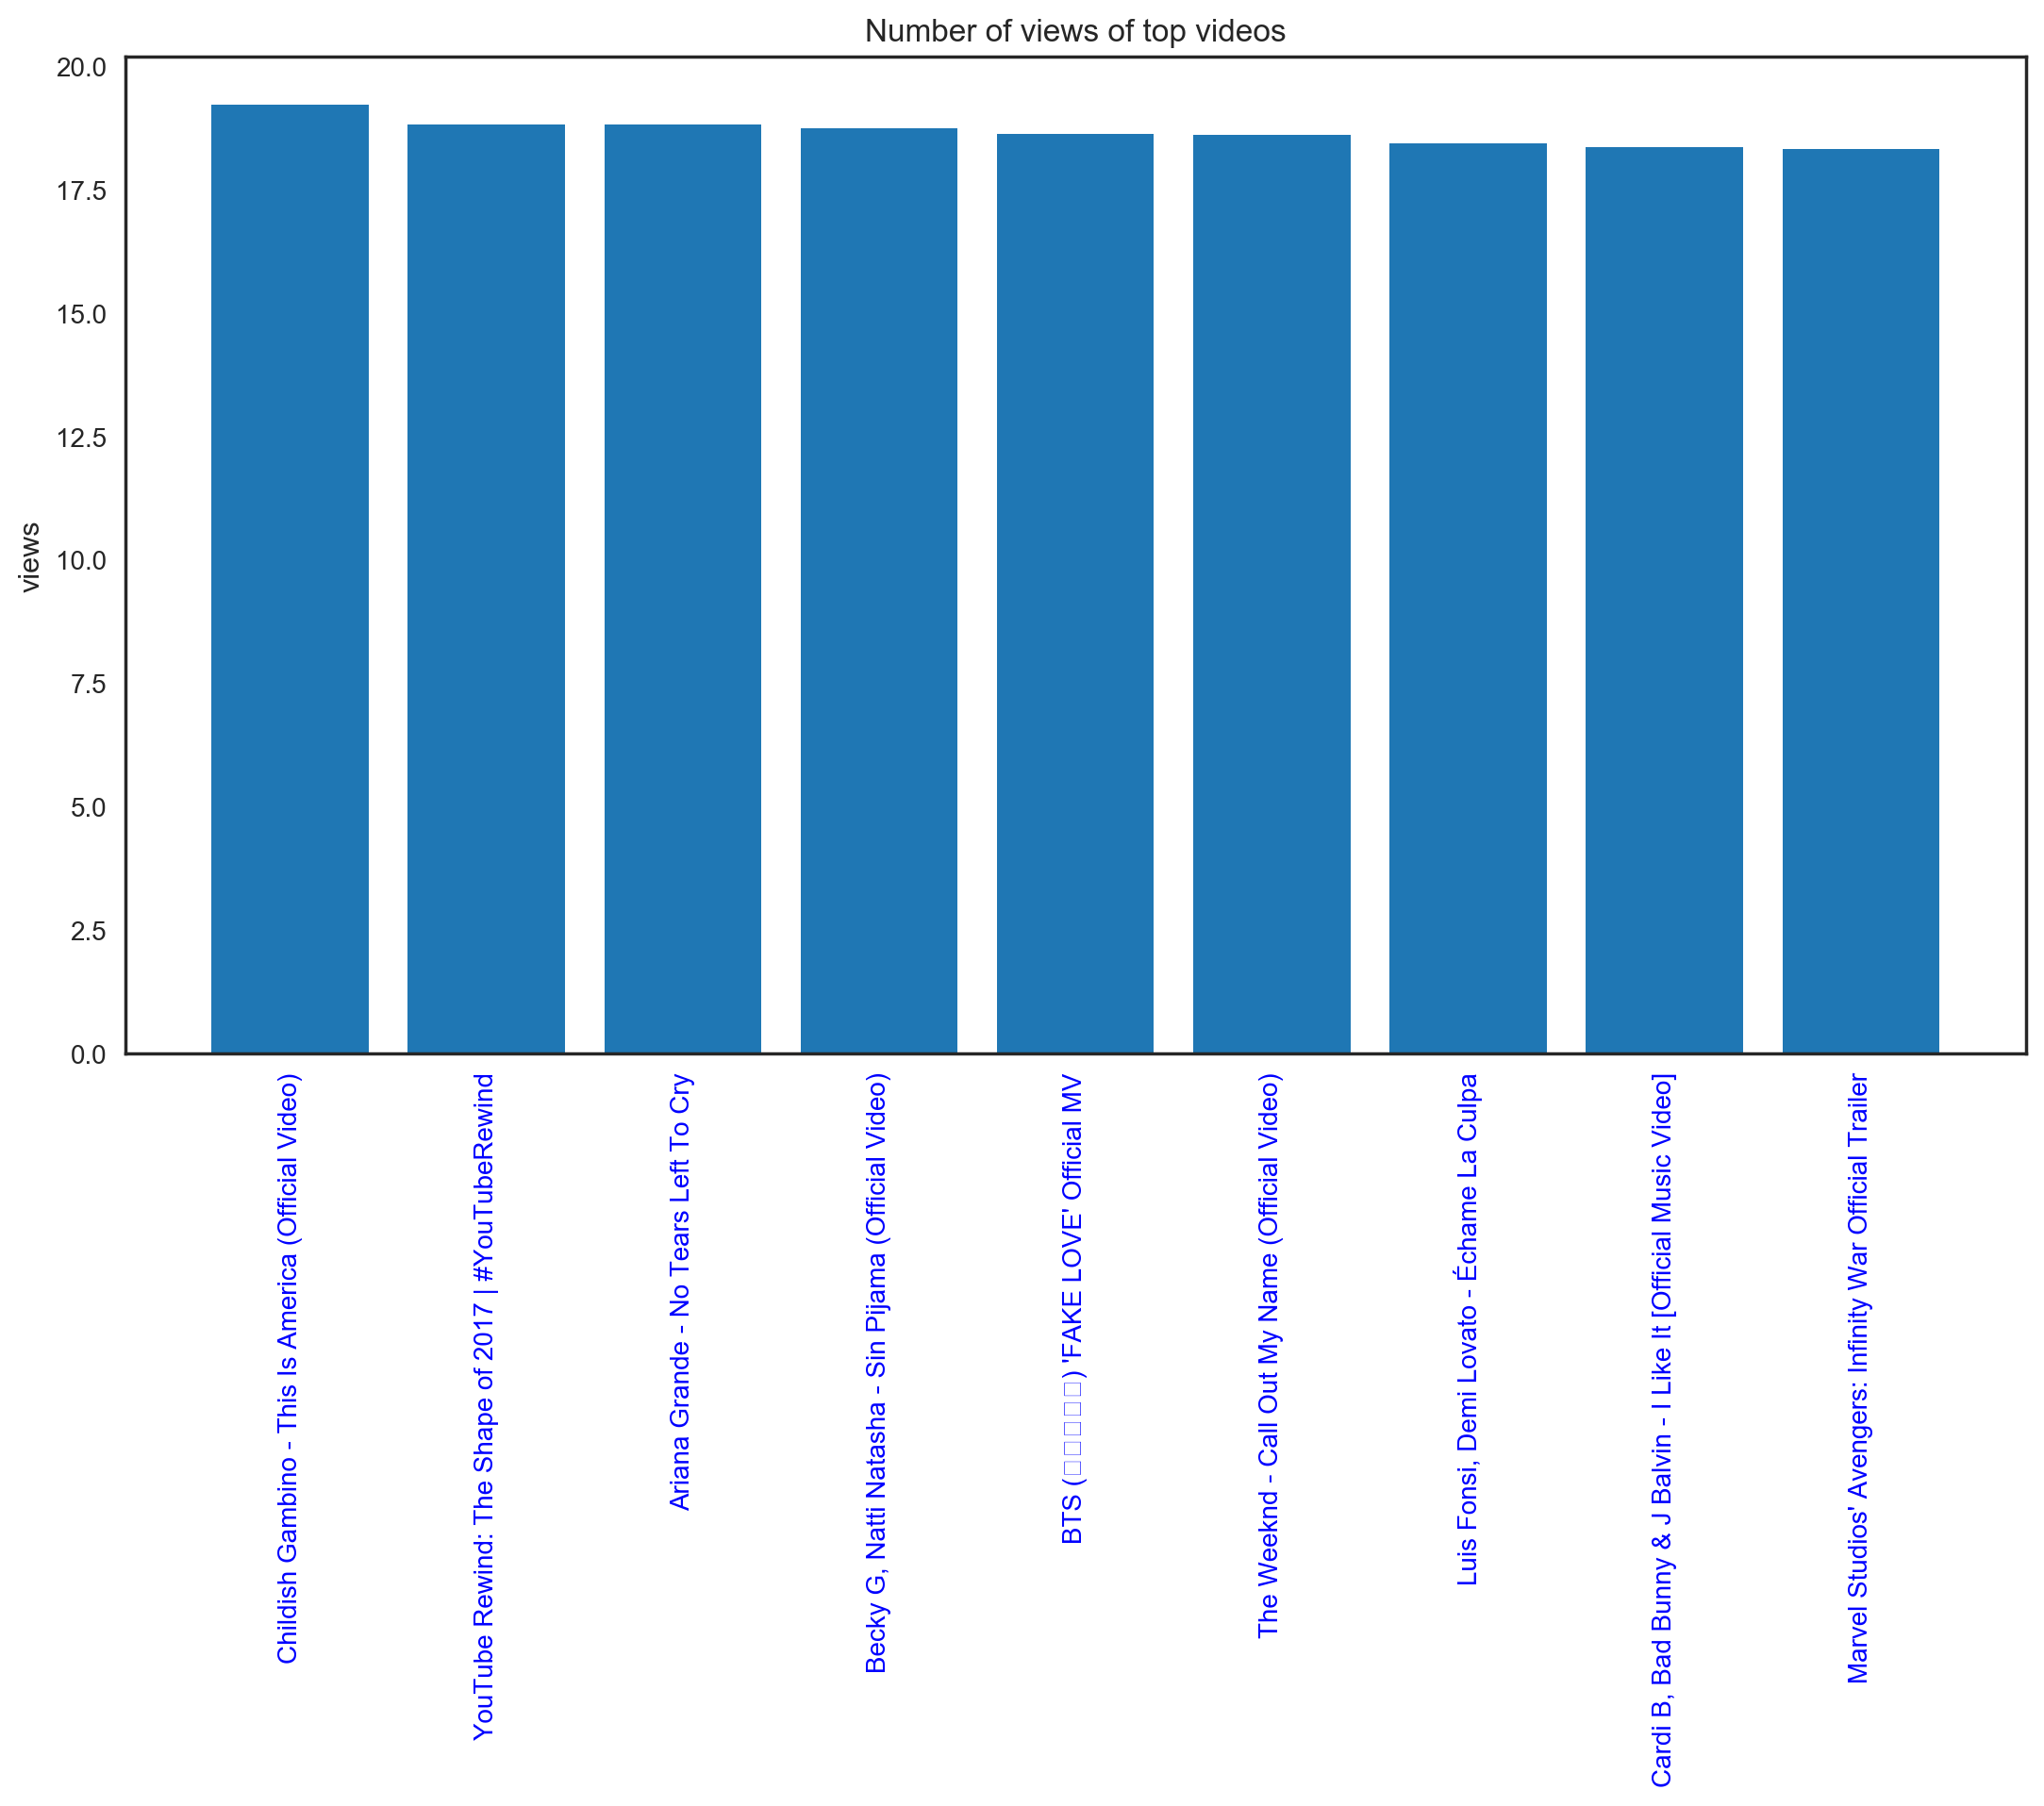

In [185]:
plt.figure(figsize=(13, 7), dpi=100)
plt.bar(y_tube_top['title'],y_tube_top['views_log'])
plt.xticks(rotation=90,color='blue')
plt.ylabel('views')
plt.title('Number of views of top videos')
plt.show()

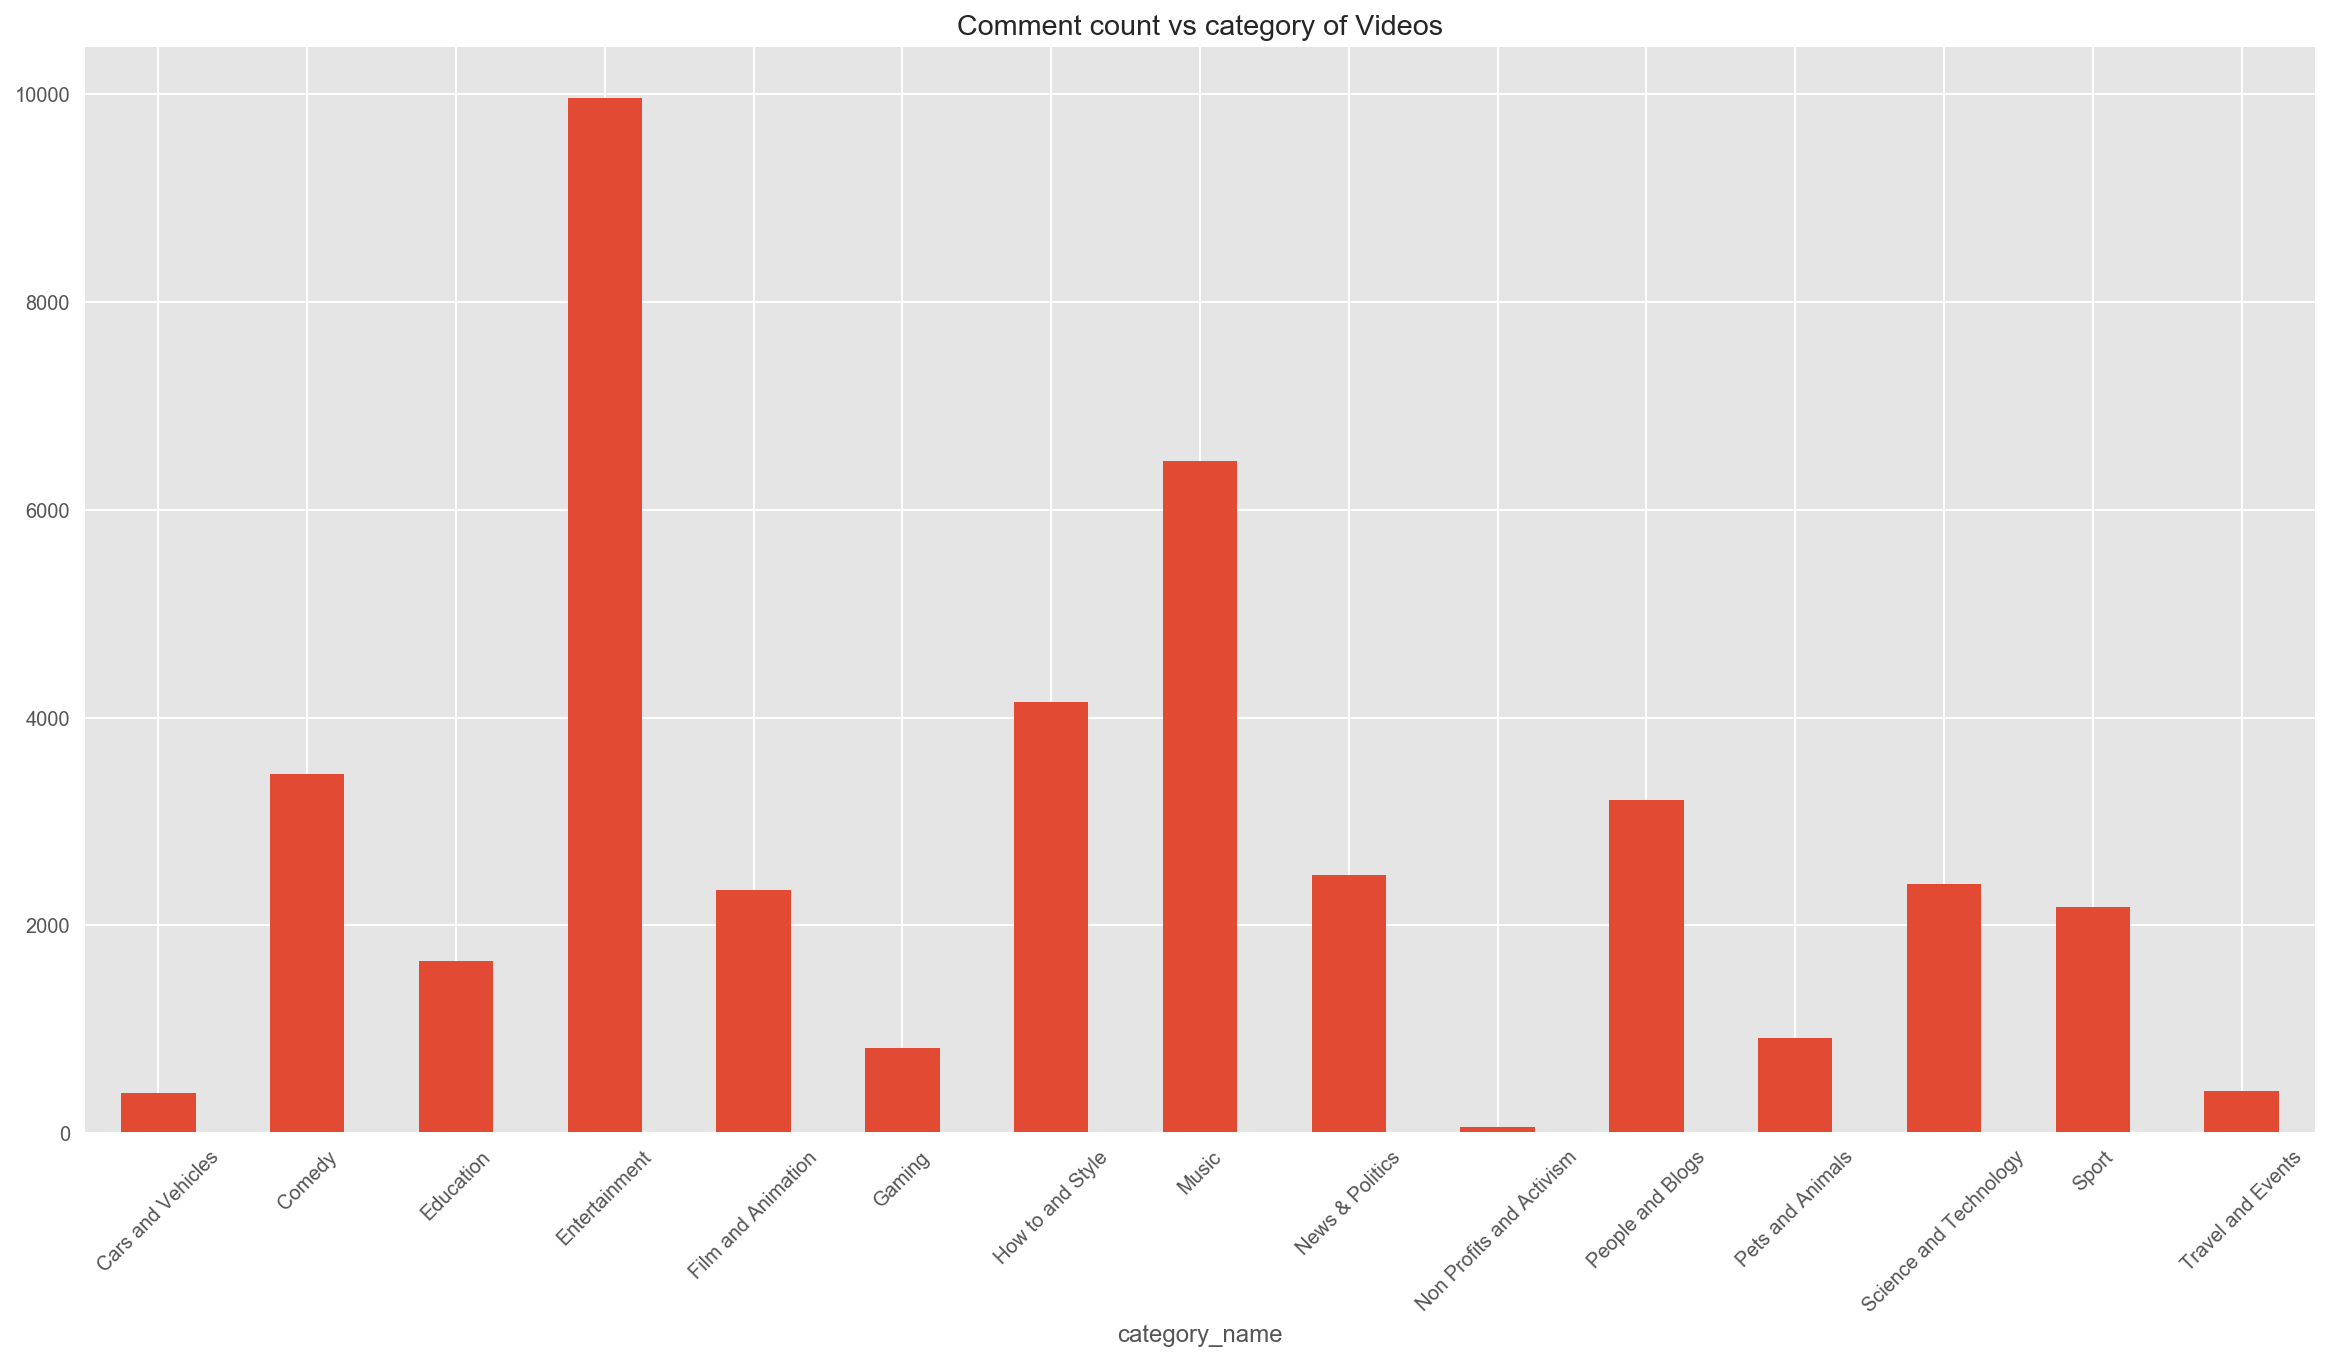

In [186]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))

phour=y_tube.groupby("category_name").count()["comment_count"].plot.bar()
phour.set_xticklabels(phour.get_xticklabels(),rotation=45)
plt.title("Comment count vs category of Videos")
sns.set_context()

In [187]:
# First plot gives an information about how many videos comes under specific category
#Second plot gives an information about how much the vidoes are viewed by customer in a specific category by considering the logarithmic function of view

Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


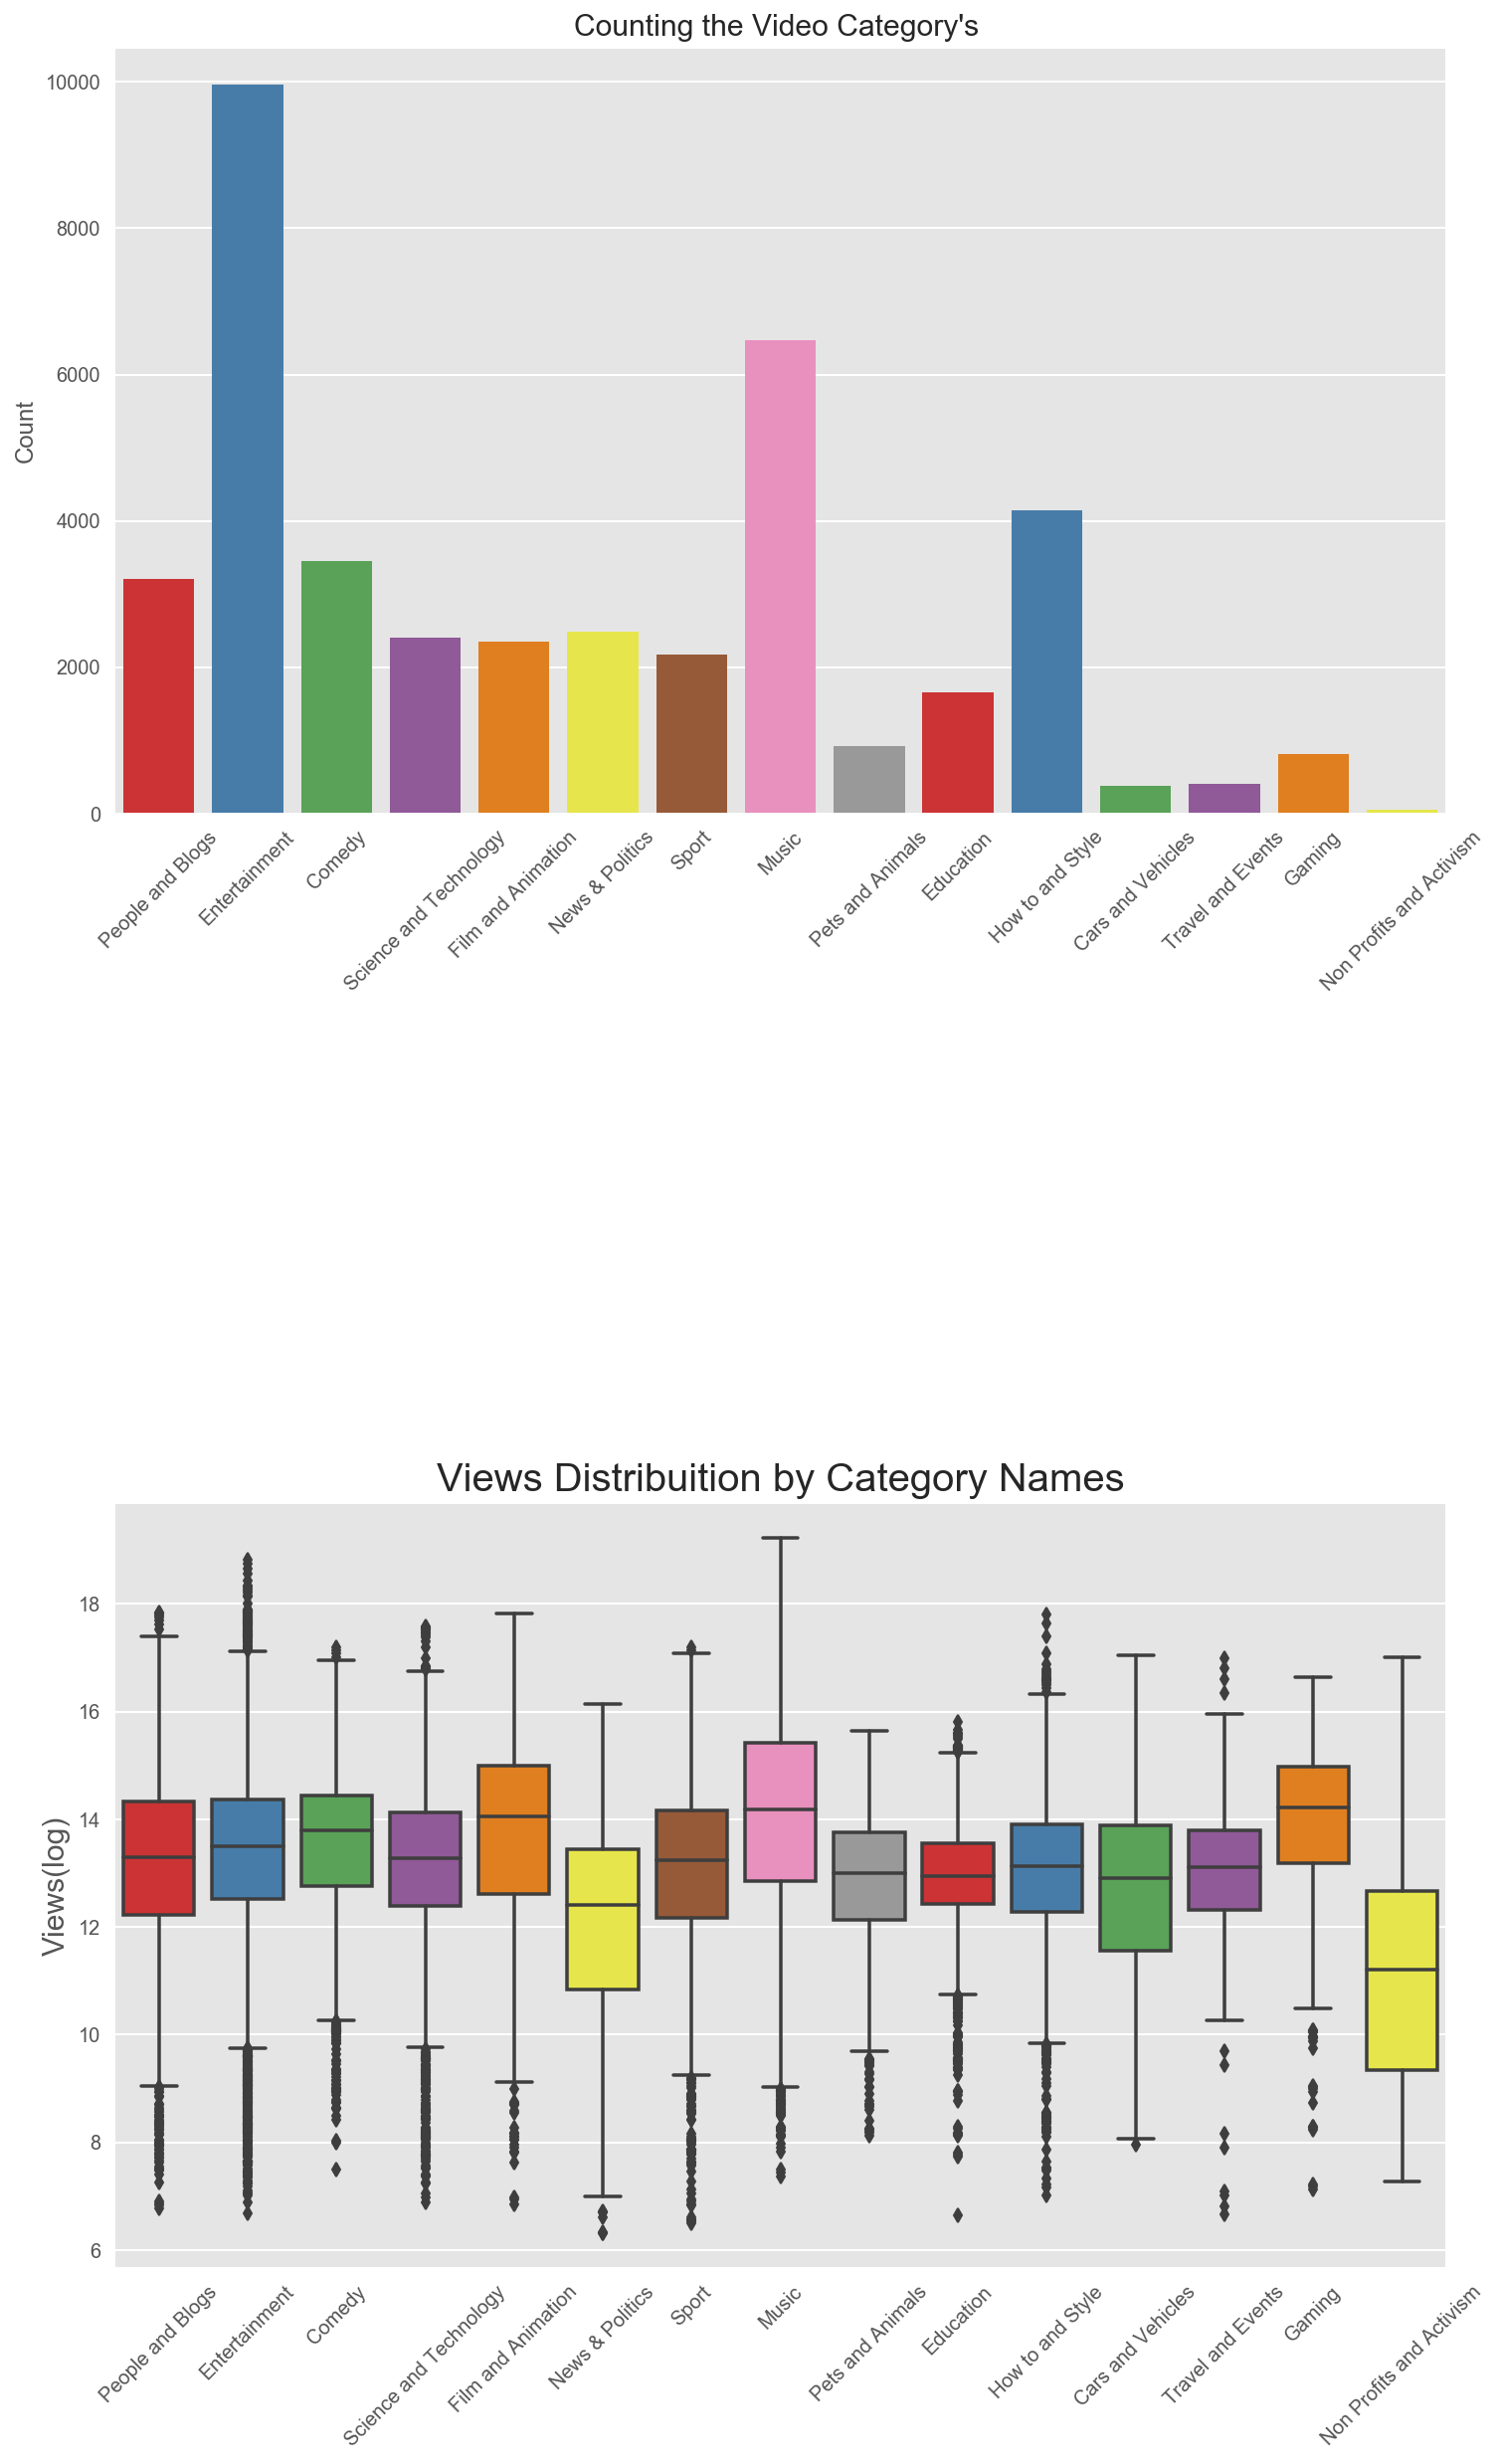

In [188]:
print("Category Name count")
print(y_tube.category_name.value_counts()[:5])

plt.figure(figsize = (12,20))

plt.subplot(211)
g = sns.countplot('category_name', data=y_tube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=y_tube, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

In [189]:
# Specifying the distribution of like values in each category by considering logarithmic function 

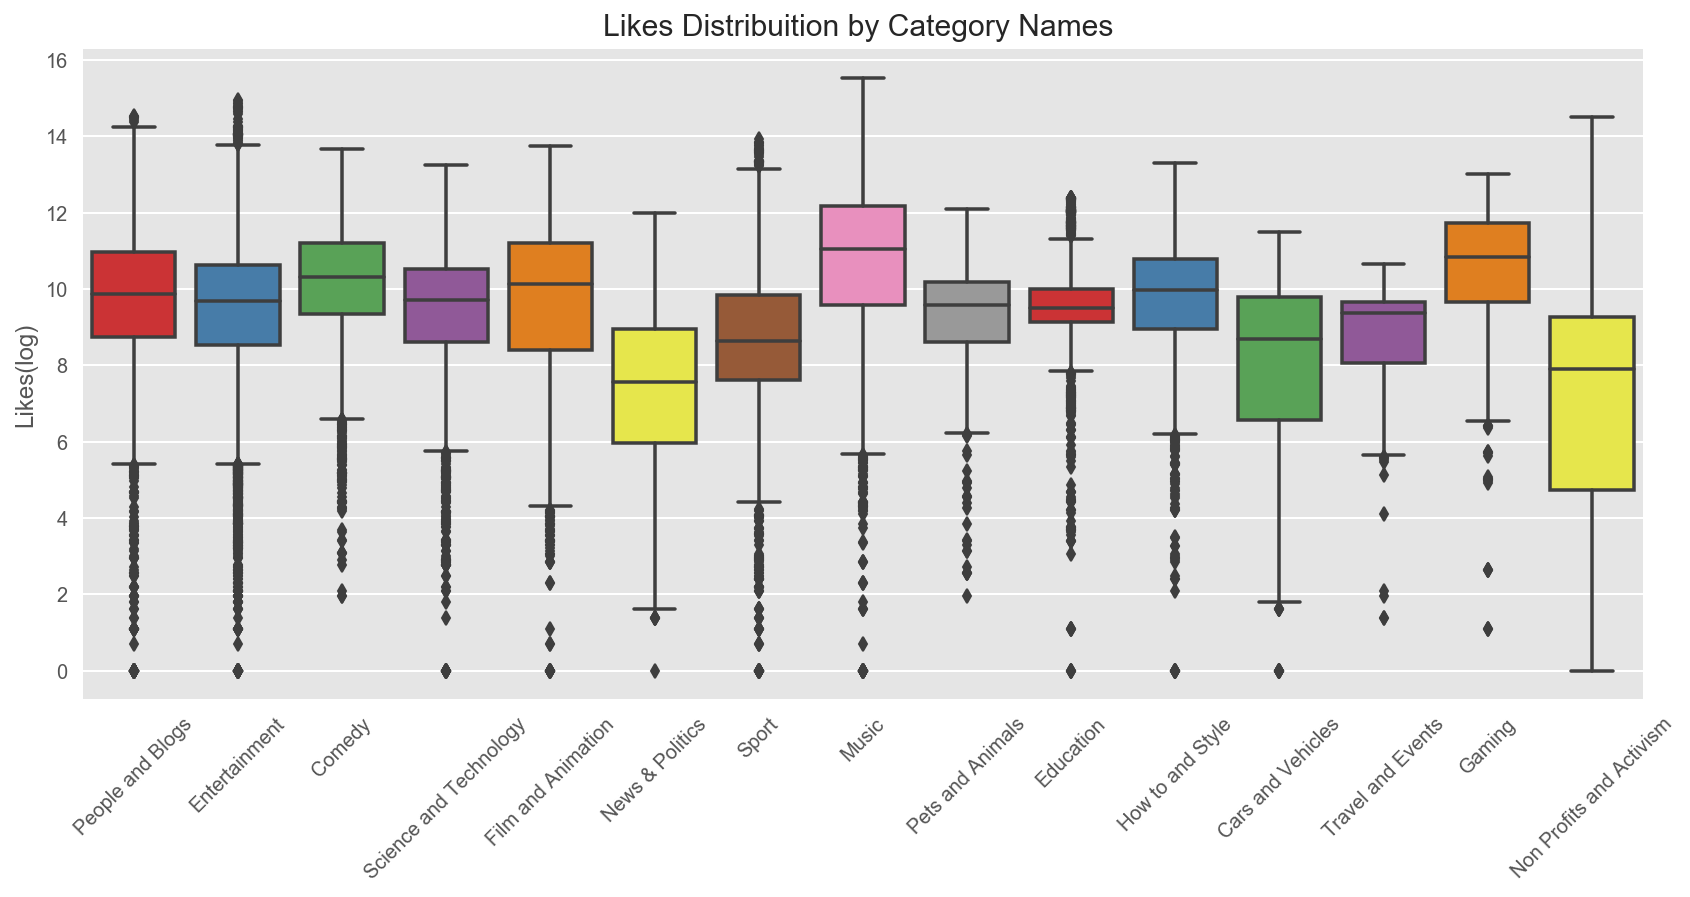

In [190]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=y_tube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

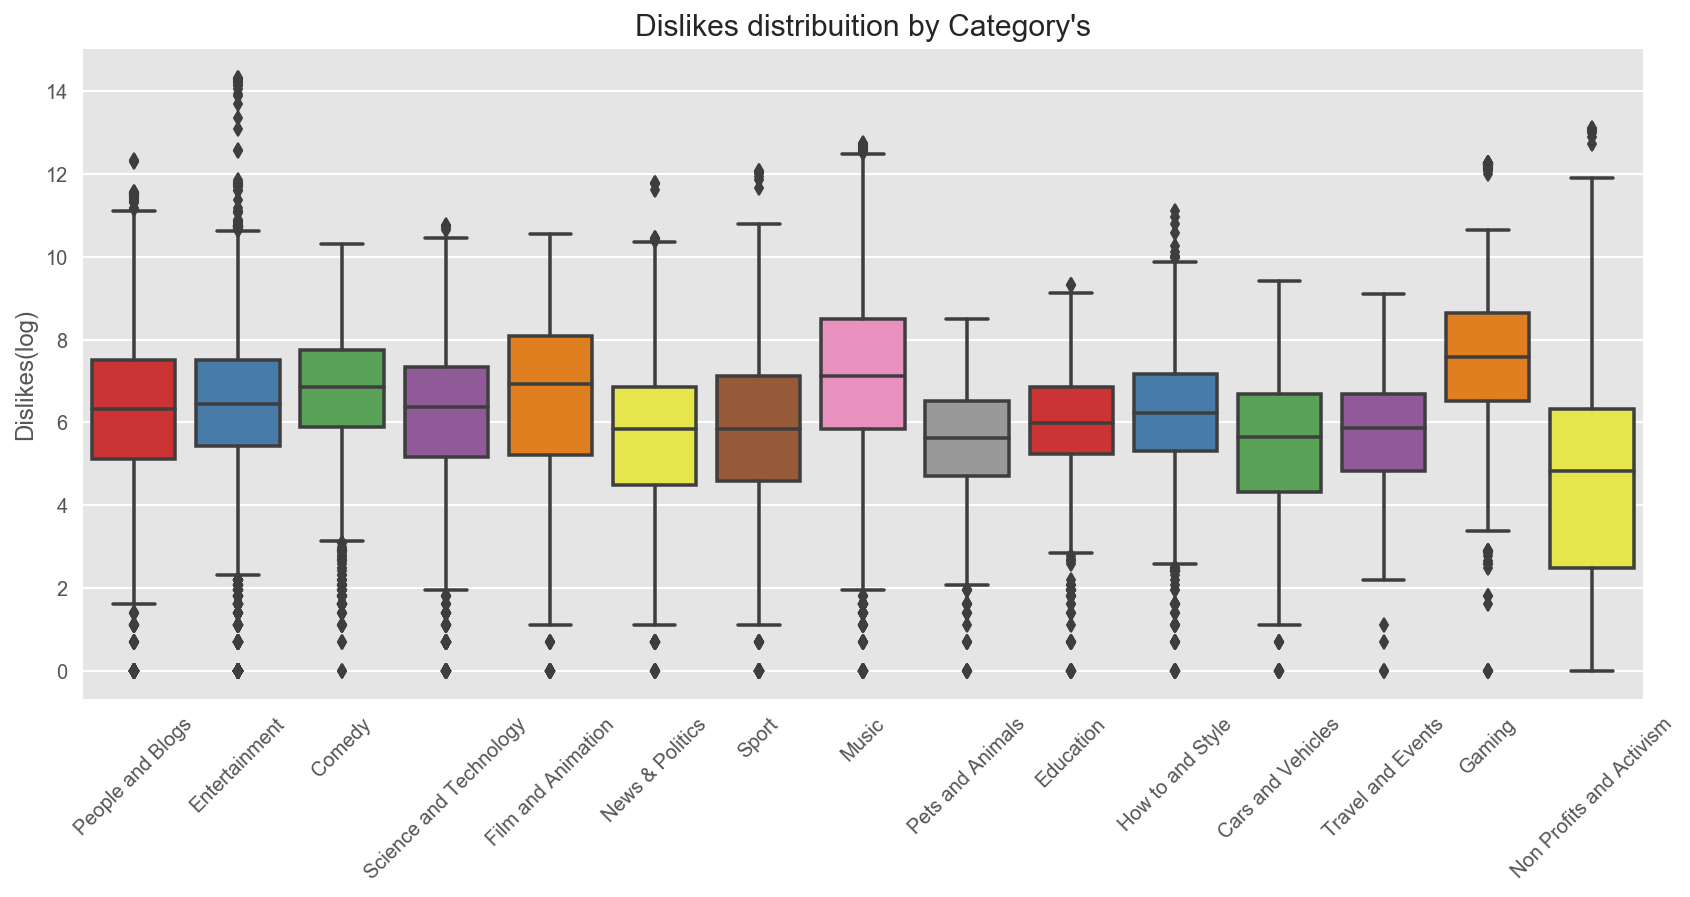

In [191]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=y_tube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

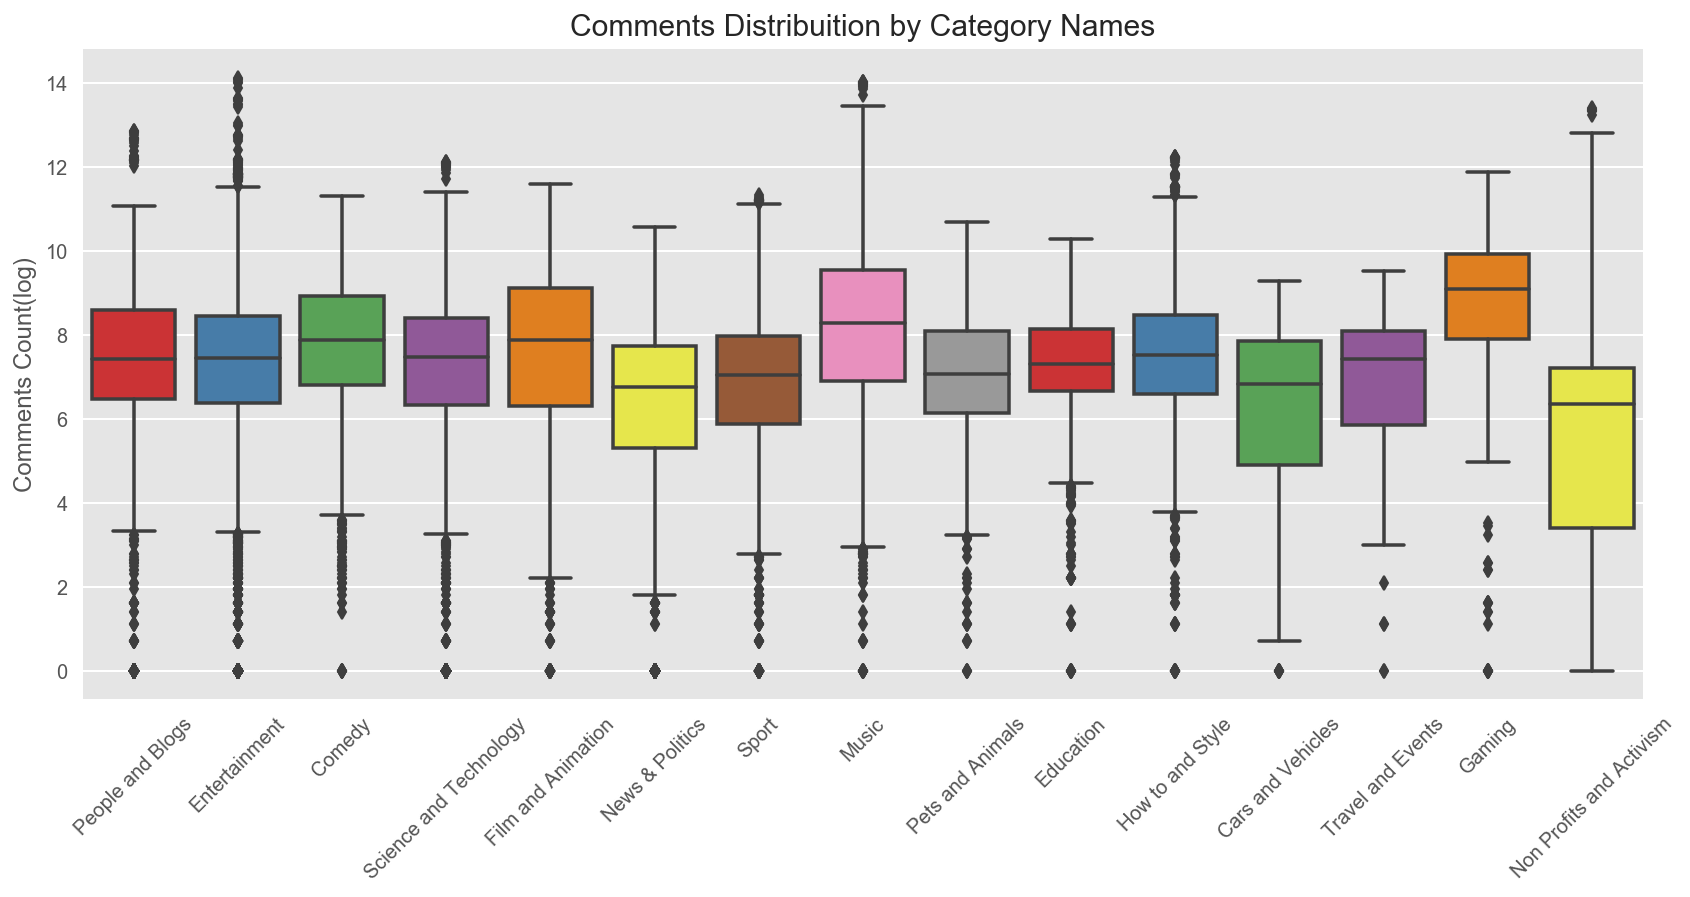

In [192]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=y_tube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

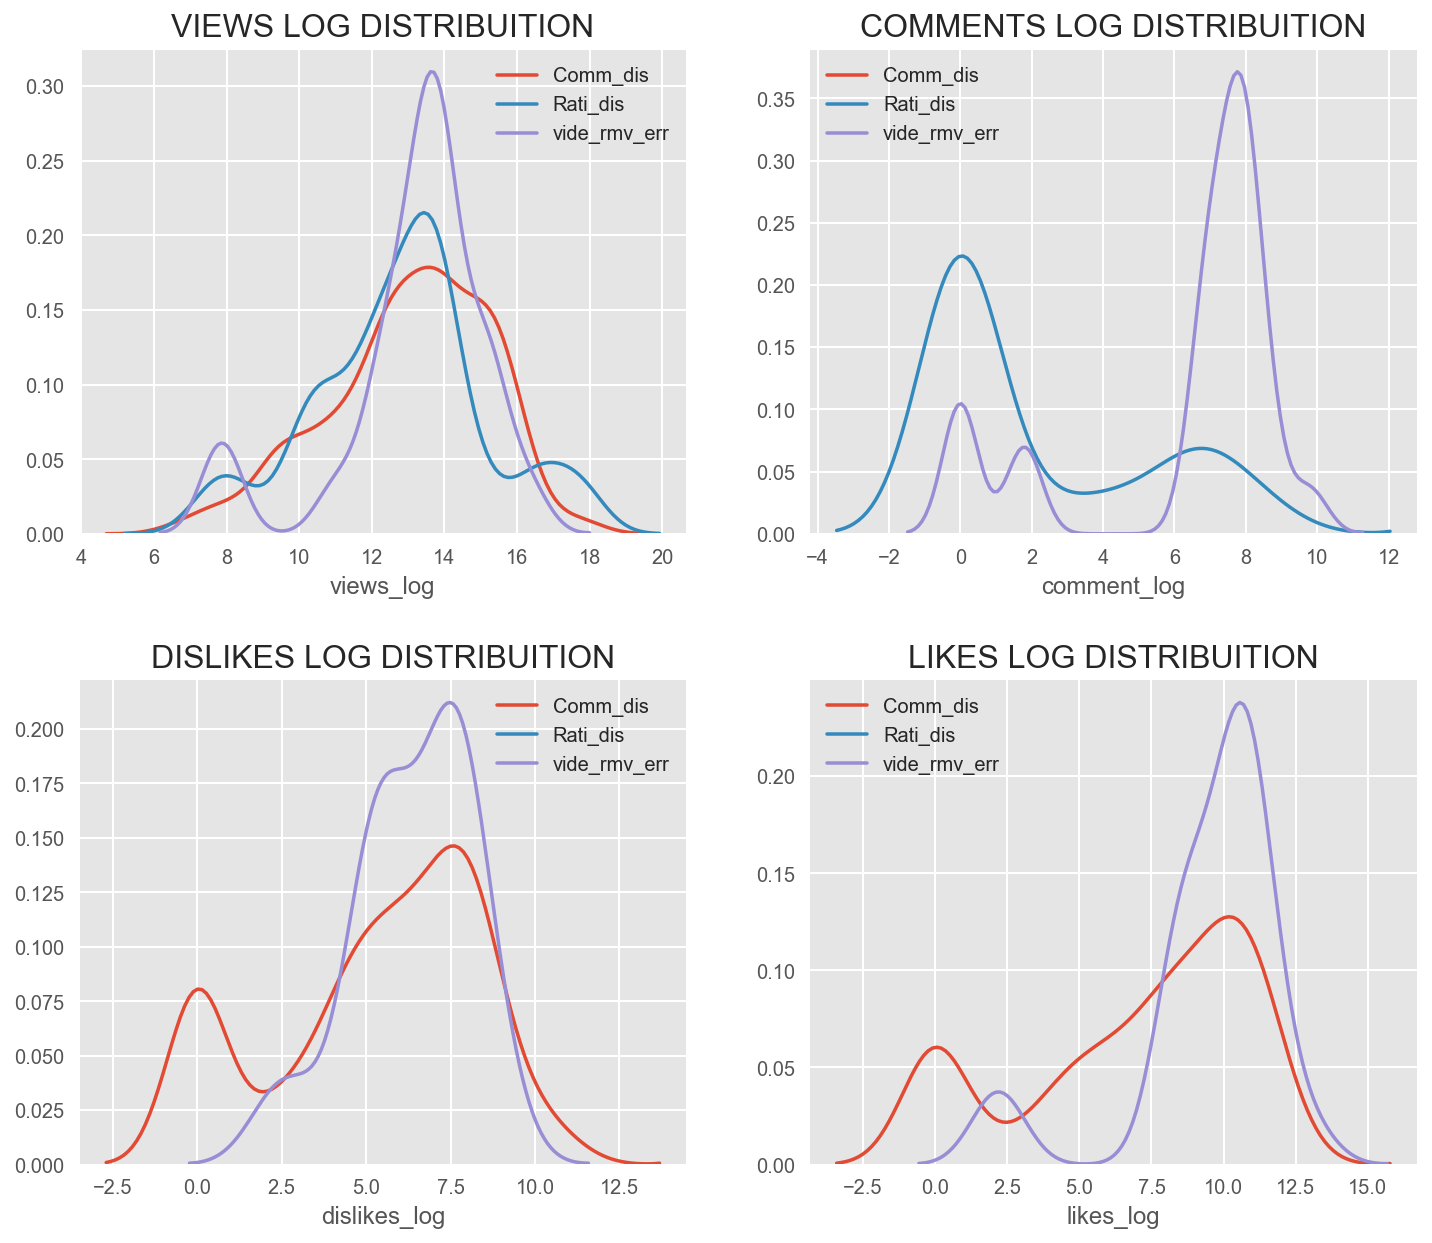

In [193]:
plt.figure(figsize = (12,10))

plt.subplot(221)
g1 = sns.distplot(y_tube[y_tube['comments_disabled'] == True]['views_log'], 
                  hist=False, label='Comm_dis')
g1 = sns.distplot(y_tube[y_tube['ratings_disabled'] == True]['views_log'], 
                  hist=False, label='Rati_dis')
g1 = sns.distplot(y_tube[y_tube['video_error_or_removed'] == True]['views_log'], 
                  hist=False, label='vide_rmv_err')
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(y_tube[y_tube['comments_disabled'] == True]['comment_log'],
                  hist=False, label='Comm_dis')
g4 = sns.distplot(y_tube[y_tube['ratings_disabled'] == True]['comment_log'], 
                  hist=False, label='Rati_dis')
g4 = sns.distplot(y_tube[y_tube['video_error_or_removed'] == True]['comment_log'], 
                  hist=False, label='vide_rmv_err')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplot(223)
g3 = sns.distplot(y_tube[y_tube['comments_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Comm_dis')
g3 = sns.distplot(y_tube[y_tube['ratings_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Rati_dis')
g3 = sns.distplot(y_tube[y_tube['video_error_or_removed'] == True]['dislikes_log'], 
                  hist=False, label='vide_rmv_err')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)
plt.subplot(224)
g2 = sns.distplot(y_tube[y_tube['comments_disabled'] == True]['likes_log'], 
                  hist=False, label='Comm_dis')
g2 = sns.distplot(y_tube[y_tube['ratings_disabled'] == True]['likes_log'], 
                  hist=False, label='Rati_dis')
g2 = sns.distplot(y_tube[y_tube['video_error_or_removed'] == True]['likes_log'], 
                  hist=False, label='vide_rmv_err')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 0.9)
plt.legend()
plt.show()

In [196]:
#Engagement Features
#I will create some new variables to us analyse the percent of likes, dislikes, comment by each category to discover what category have the highest engagement

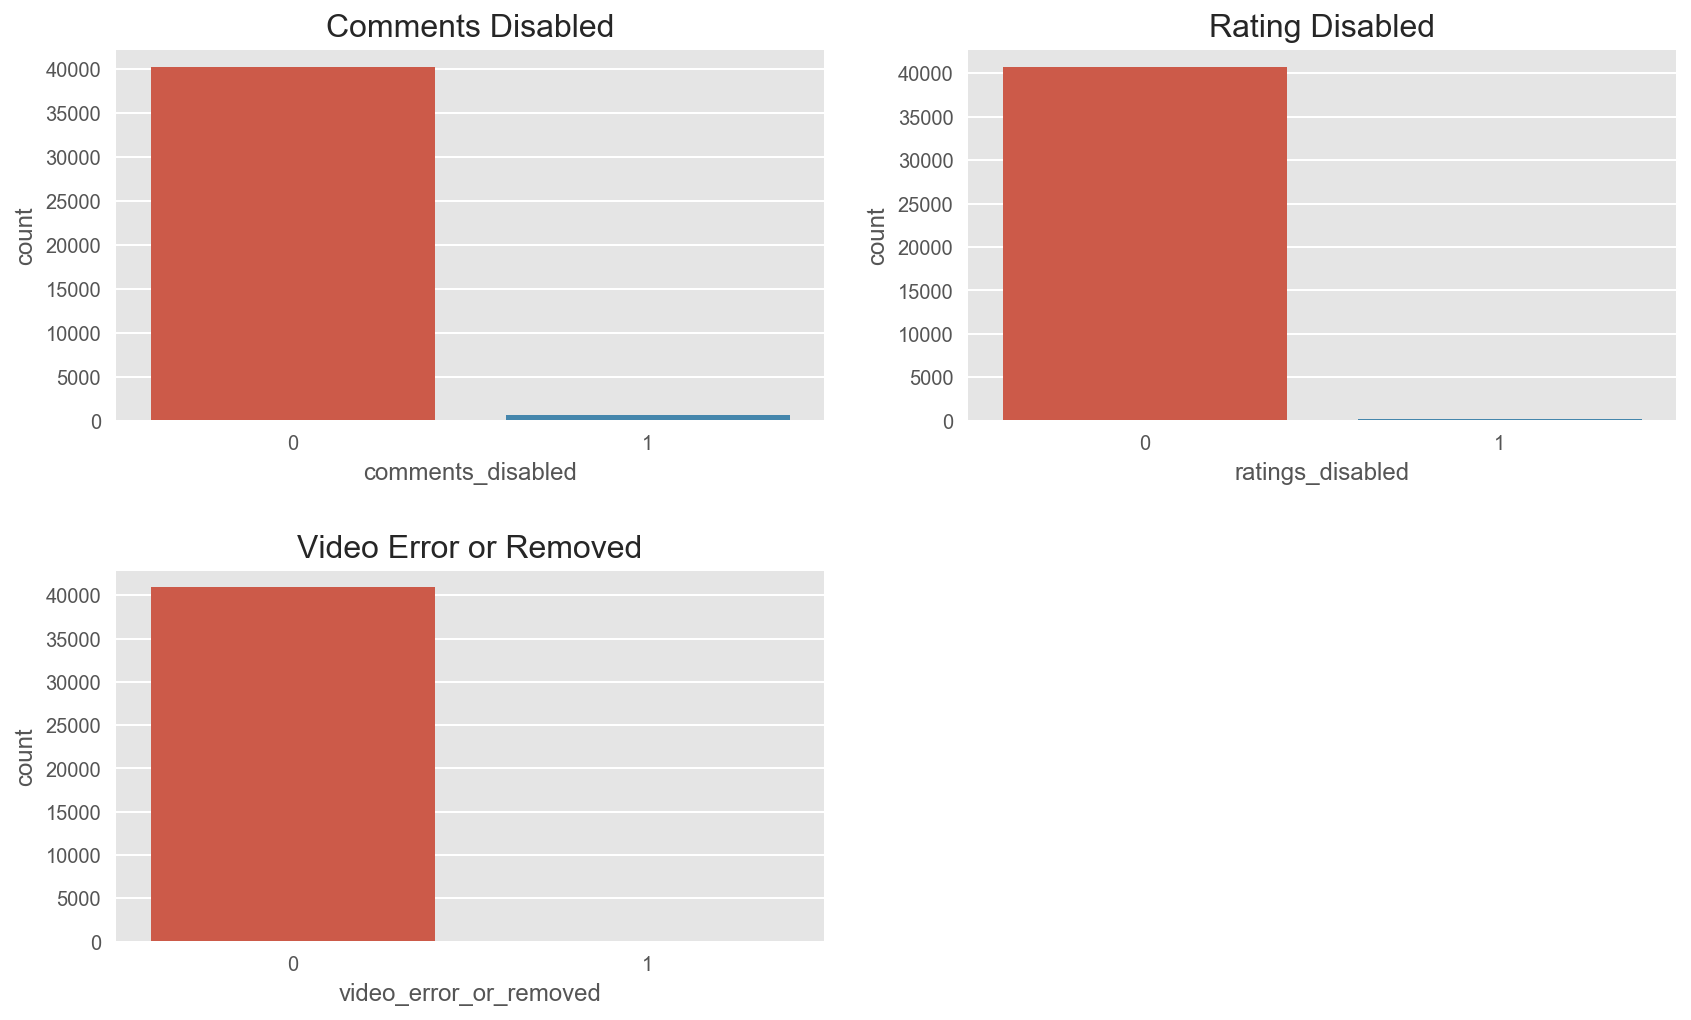

In [197]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=y_tube)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=y_tube)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=y_tube)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

In [198]:
y_tube['like_rate'] =  y_tube ['likes'] / y_tube['views'] * 100
y_tube['dislike_rate'] =  y_tube['dislikes'] / y_tube['views'] * 100
y_tube['comment_rate'] =  y_tube ['comment_count'] / y_tube['views'] * 100

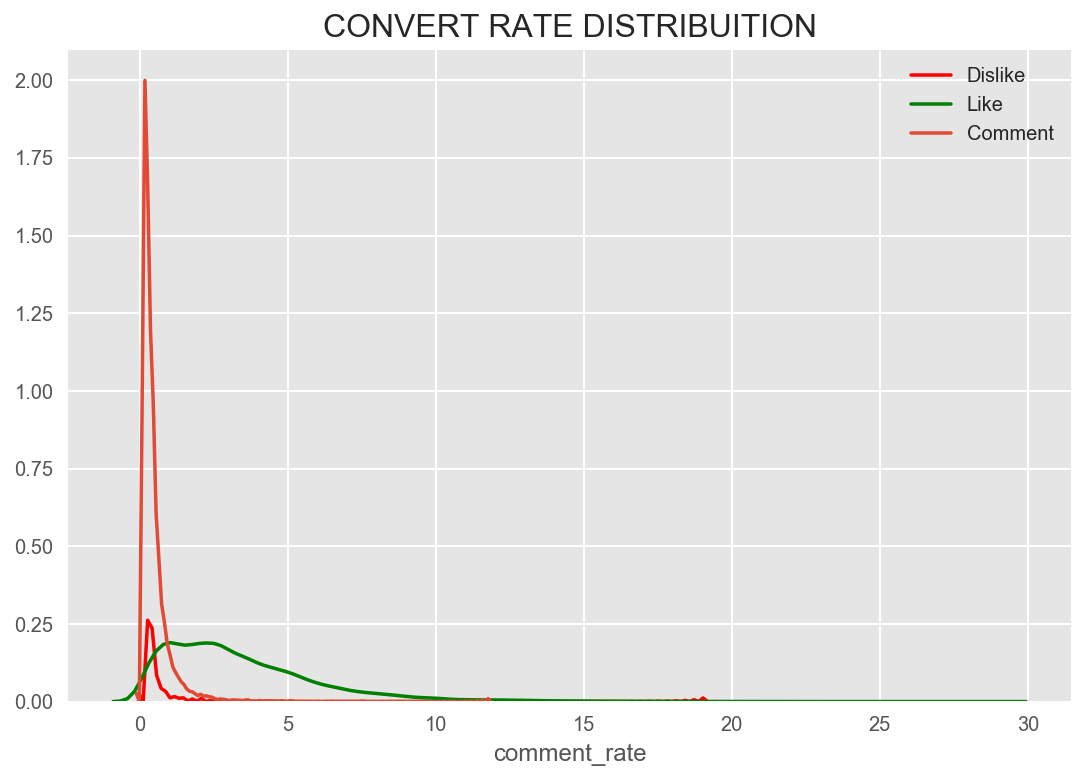

In [199]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(y_tube['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(y_tube['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(y_tube['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

In [200]:
#Very meaningful distribuition! Like x Dislikes rate have interesting differences

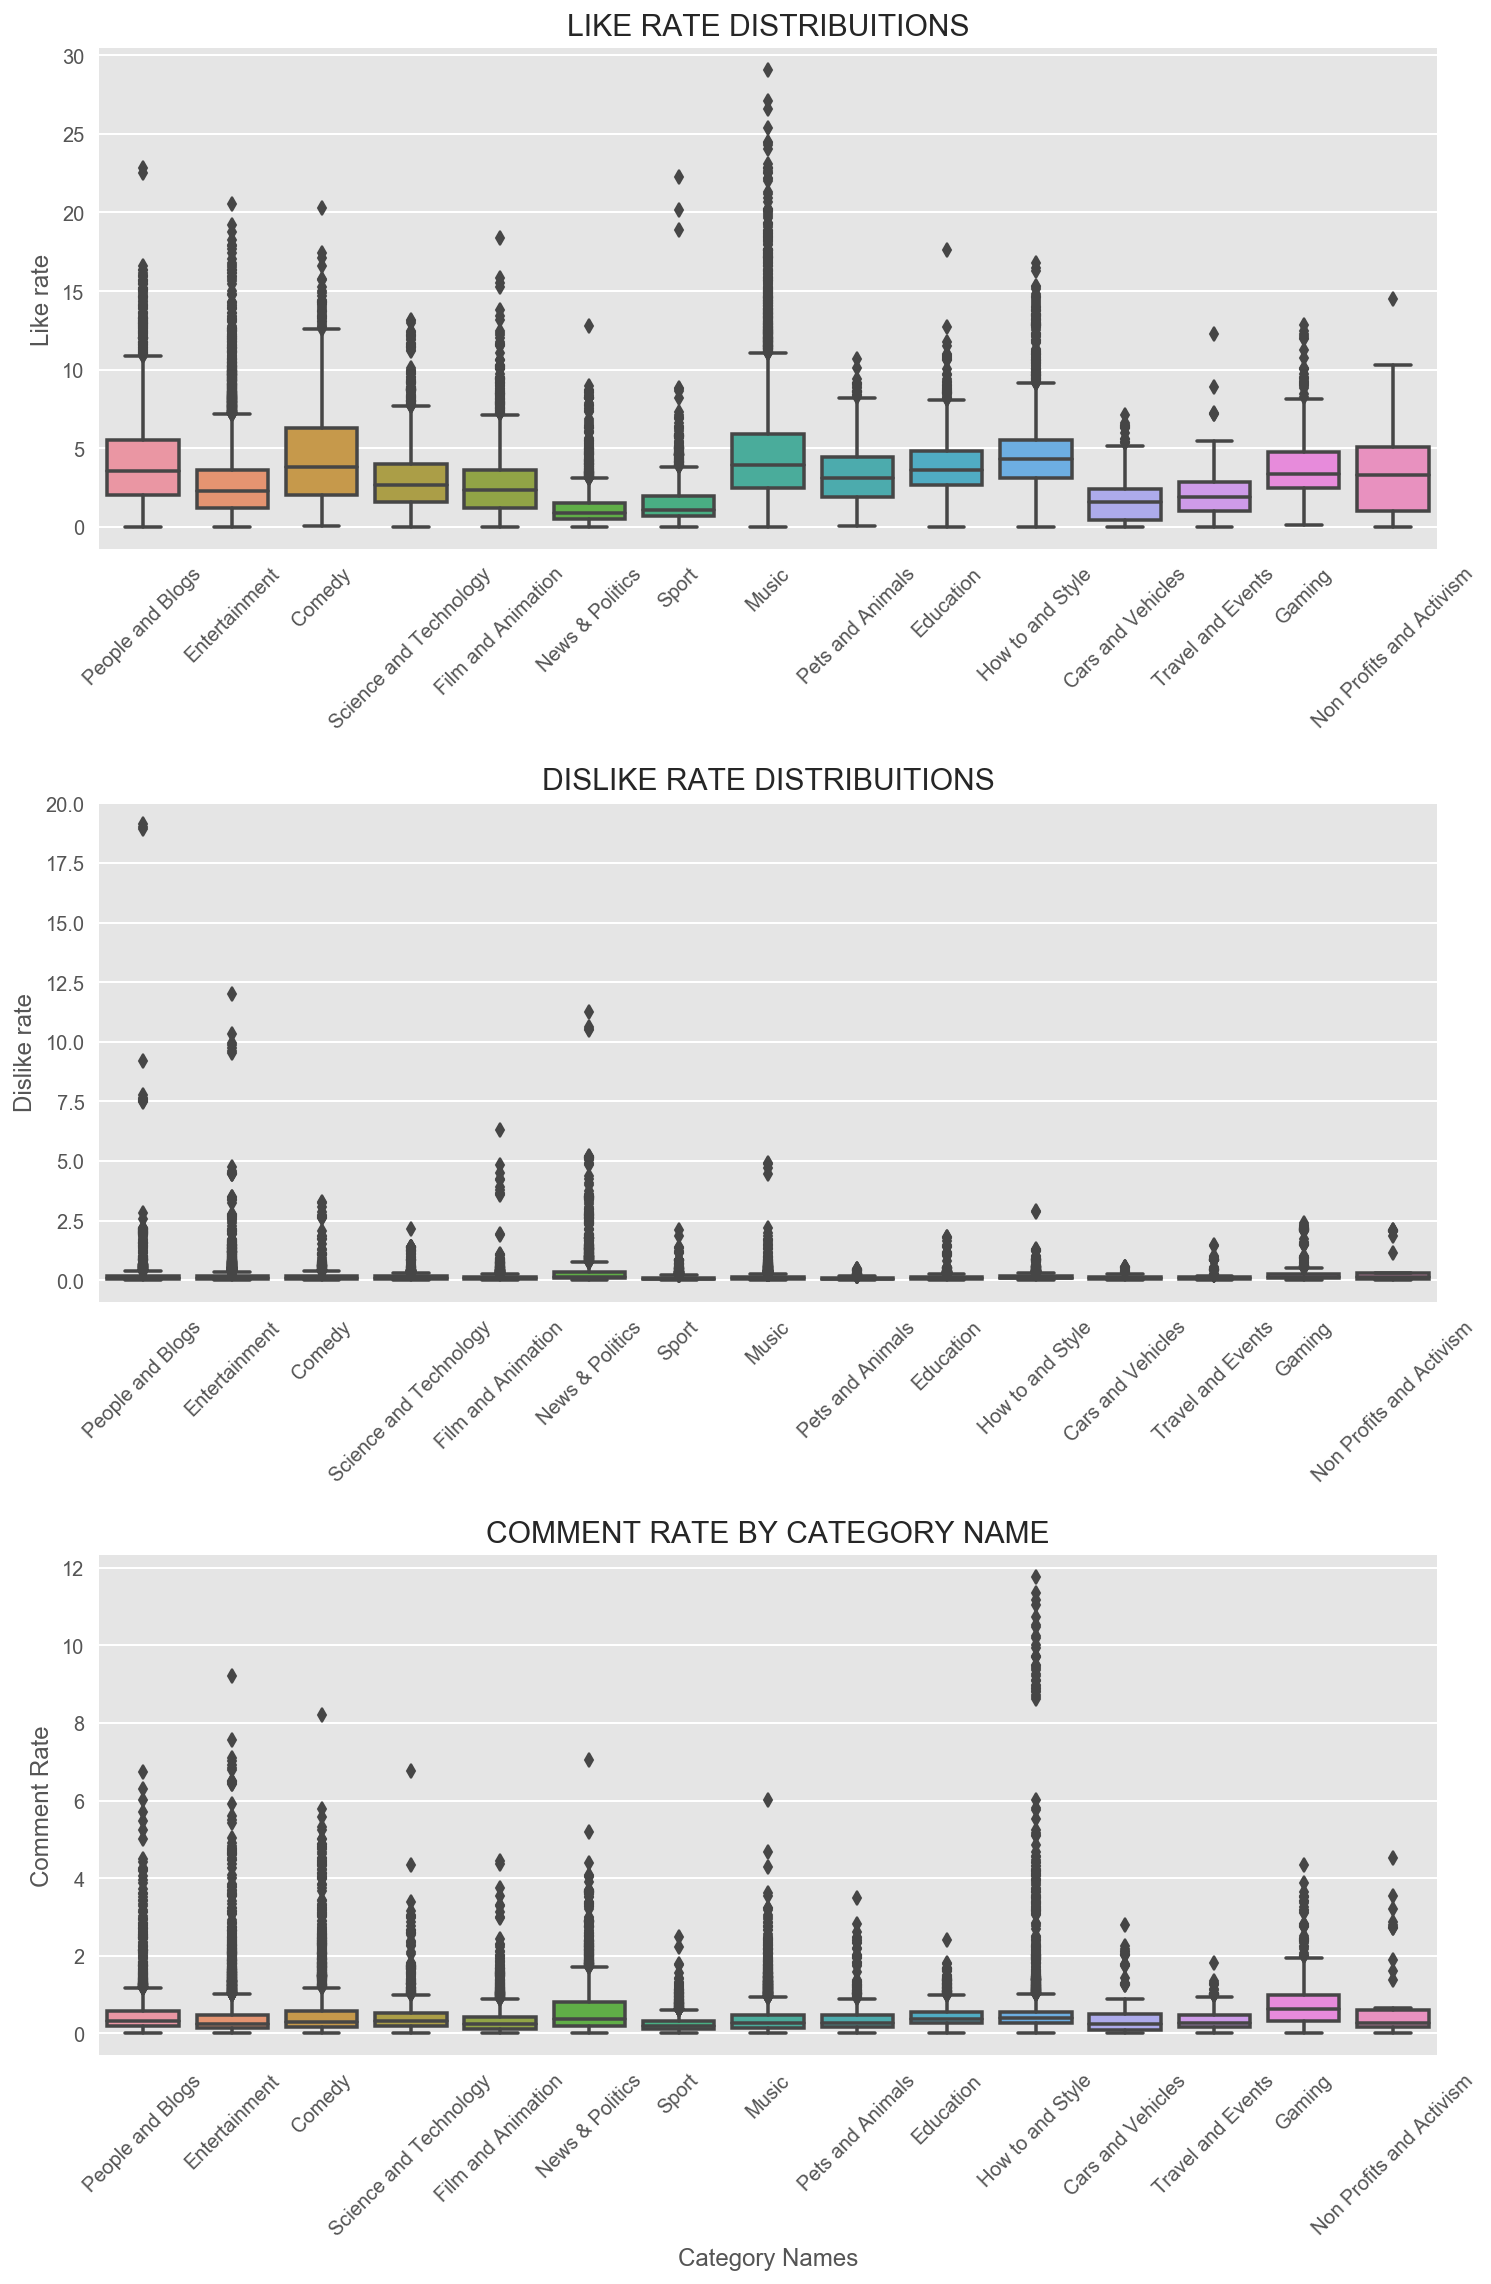

In [201]:
plt.figure(figsize = (12,18))
plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=y_tube)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUITIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=y_tube)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUITIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=y_tube)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

In [203]:
#Let's look the kde of this variables separated to deep understand them

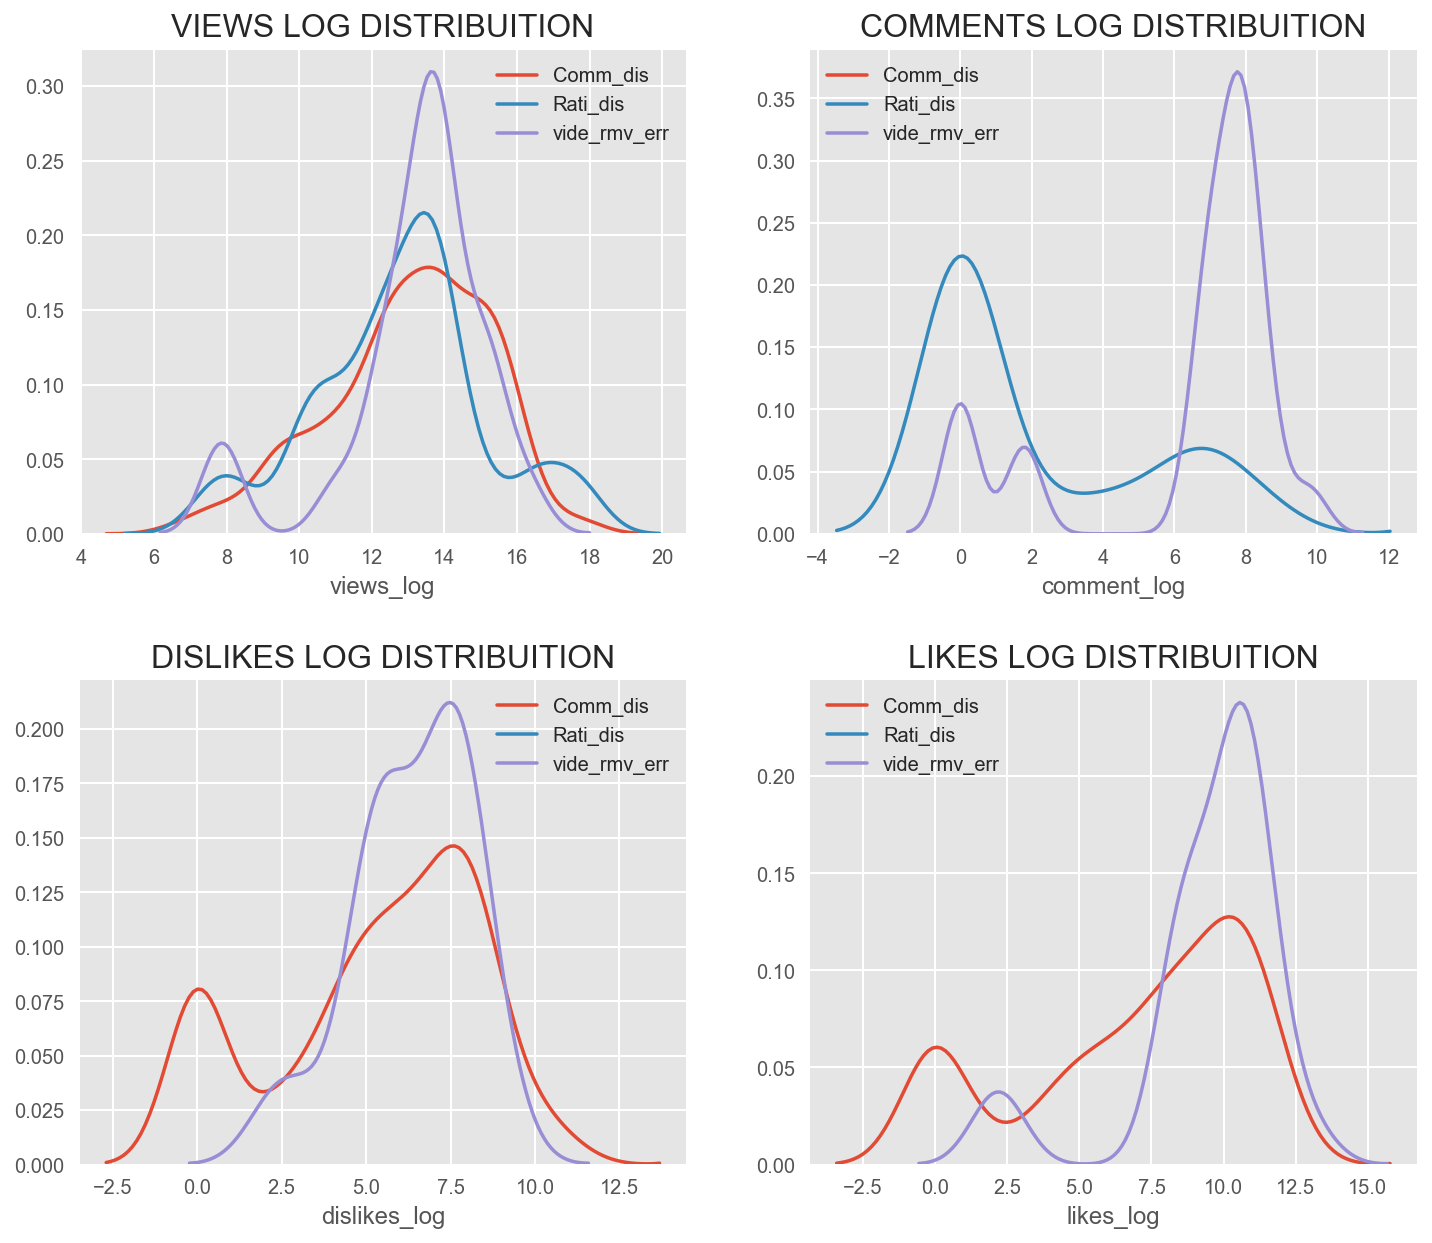

In [204]:
plt.figure(figsize = (12,10))

plt.subplot(221)
g1 = sns.distplot(y_tube[y_tube['comments_disabled'] == True]['views_log'], 
                  hist=False, label='Comm_dis')
g1 = sns.distplot(y_tube[y_tube['ratings_disabled'] == True]['views_log'], 
                  hist=False, label='Rati_dis')
g1 = sns.distplot(y_tube[y_tube['video_error_or_removed'] == True]['views_log'], 
                  hist=False, label='vide_rmv_err')
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(y_tube[y_tube['comments_disabled'] == True]['comment_log'],
                  hist=False, label='Comm_dis')
g4 = sns.distplot(y_tube[y_tube['ratings_disabled'] == True]['comment_log'], 
                  hist=False, label='Rati_dis')
g4 = sns.distplot(y_tube[y_tube['video_error_or_removed'] == True]['comment_log'], 
                  hist=False, label='vide_rmv_err')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplot(223)
g3 = sns.distplot(y_tube[y_tube['comments_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Comm_dis')
g3 = sns.distplot(y_tube[y_tube['ratings_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Rati_dis')
g3 = sns.distplot(y_tube[y_tube['video_error_or_removed'] == True]['dislikes_log'], 
                  hist=False, label='vide_rmv_err')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(y_tube[y_tube['comments_disabled'] == True]['likes_log'], 
                  hist=False, label='Comm_dis')
g2 = sns.distplot(y_tube[y_tube['ratings_disabled'] == True]['likes_log'], 
                  hist=False, label='Rati_dis')
g2 = sns.distplot(y_tube[y_tube['video_error_or_removed'] == True]['likes_log'], 
                  hist=False, label='vide_rmv_err')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 0.9)
plt.legend()
plt.show()

In [205]:
# Trending_date  & publish_time
y_tube.loc[:5, ['video_id', 'trending_date', 'publish_time']]

video_id trending_date        publish_time
0  2kyS6SvSYSE    2017-11-14 2017-11-13 17:13:01
1  1ZAPwfrtAFY    2017-11-14 2017-11-13 07:30:00
2  5qpjK5DgCt4    2017-11-14 2017-11-12 19:05:24
3  puqaWrEC7tY    2017-11-14 2017-11-13 11:00:04
4  d380meD0W0M    2017-11-14 2017-11-12 18:01:41
5  gHZ1Qz0KiKM    2017-11-14 2017-11-13 19:07:23

# LINEAR REGRESSION ANALYSIS

In [207]:
ytube_reg=y_tube.drop(columns=['video_id','channel_title','category_id','tags','dislikes','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description','dislike_rate'],axis=1)

In [208]:
ytube_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 13 columns):
trending_date    40949 non-null datetime64[ns]
title            40949 non-null object
publish_time     40949 non-null datetime64[ns]
views            40949 non-null int64
likes            40949 non-null int64
comment_count    40949 non-null int64
category_name    40892 non-null object
likes_log        40949 non-null float64
views_log        40949 non-null float64
dislikes_log     40949 non-null float64
comment_log      40949 non-null float64
like_rate        40949 non-null float64
comment_rate     40949 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(3), object(2)
memory usage: 4.1+ MB


In [209]:
ytube_reg.nunique()

trending_date      205
title             6455
publish_time      6269
views            40478
likes            29850
comment_count    13773
category_name       15
likes_log        29850
views_log        40478
dislikes_log      8516
comment_log      13773
like_rate        40699
comment_rate     40106
dtype: int64

In [210]:
column_list=['trending_date','title','publish_time','views','likes','comment_count','category_name','likes_log','views_log','dislikes_log','comment_log','like_rate','comment_rate']   

In [211]:
ytube_reg.drop_duplicates(column_list)

trending_date                                              title  \
0        2017-11-14                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1        2017-11-14  The Trump Presidency: Last Week Tonight with J...   
2        2017-11-14  Racist Superman | Rudy Mancuso, King Bach & Le...   
3        2017-11-14                   Nickelback Lyrics: Real or Fake?   
4        2017-11-14                           I Dare You: GOING BALD!?   
...             ...                                                ...   
40944    2018-06-14                       The Cat Who Caught the Laser   
40945    2018-06-14                         True Facts : Ant Mutualism   
40946    2018-06-14  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947    2018-06-14                How Black Panther Should Have Ended   
40948    2018-06-14  Official Call of Duty®: Black Ops 4 — Multipla...   

             publish_time     views   likes  comment_count  \
0     2017-11-13 17:13:01    748374   57527          15954   
1     2017-11-13 07:30:00   2418783   97185          12703   
2     2017-11-12 19:05:24   3191434  146033           8181   
3     2017-11-13 11:00:04    343168   10172           2146   
4     2017-11-12 18:01:41   2095731  132235          17518   
...                   ...       ...     ...            ...   
40944 2018-05-18 13:00:04   1685609   38160           2657   
40945 2018-05-18 01:00:06   1064798   60008           3936   
40946 2018-05-18 17:34:22   1066451   48068           3992   
40947 2018-05-17 17:00:04   5660813  192957          13088   
40948 2018-05-17 17:09:38  10306119  357079         144795   

            category_name  likes_log  views_log  dislikes_log  comment_log  \
0        People and Blogs  10.960027  13.525659      7.995307     9.677528   
1           Entertainment  11.484382  14.698775      8.723719     9.449672   
2                  Comedy  11.891595  14.975981      8.582981     9.009692   
3           Entertainment   9.227492  12.745978      6.502790     7.671827   
4           Entertainment  11.792343  14.555413      7.595890     9.771041   
...                   ...        ...        ...           ...          ...   
40944    Pets and Animals  10.549569  14.337638      7.234177     7.885329   
40945    People and Blogs  11.002250  13.878297      5.948035     8.278174   
40946       Entertainment  10.780393  13.879848      6.940222     8.292298   
40947  Film and Animation  12.170228  15.549078      7.954021     9.479527   
40948              Gaming  12.785715  16.148248     12.268939    11.883081   

       like_rate  comment_rate  
0       7.686932      2.131822  
1       4.017930      0.525181  
2       4.575780      0.256342  
3       2.964146      0.625350  
4       6.309732      0.835890  
...          ...           ...  
40944   2.263870      0.157628  
40945   5.635623      0.369648  
40946   4.507286      0.374326  
40947   3.408645      0.231204  
40948   3.464728      1.404942  

[40901 rows x 13 columns]

In [212]:
ytube_reg['is_duplicated'] = ytube_reg.duplicated(['trending_date', 'title','publish_time','views','likes','comment_count','category_name','likes_log','views_log','dislikes_log','comment_log','like_rate','comment_rate'])

In [213]:
ytube_reg1=ytube_reg.drop(['trending_date','title','publish_time','likes_log','views_log','dislikes_log','comment_log','like_rate','comment_rate','category_name','is_duplicated'],axis=1)

In [214]:
ytube_reg1

views   likes  comment_count
0        748374   57527          15954
1       2418783   97185          12703
2       3191434  146033           8181
3        343168   10172           2146
4       2095731  132235          17518
...         ...     ...            ...
40944   1685609   38160           2657
40945   1064798   60008           3936
40946   1066451   48068           3992
40947   5660813  192957          13088
40948  10306119  357079         144795

[40949 rows x 3 columns]

In [215]:
ytube_reg1.drop_duplicates(subset=['views','likes','comment_count'],keep=False)

views   likes  comment_count
0        748374   57527          15954
1       2418783   97185          12703
2       3191434  146033           8181
3        343168   10172           2146
4       2095731  132235          17518
...         ...     ...            ...
40944   1685609   38160           2657
40945   1064798   60008           3936
40946   1066451   48068           3992
40947   5660813  192957          13088
40948  10306119  357079         144795

[40807 rows x 3 columns]

In [216]:
##COST FUNCTION
##y_approx = m_current*x + b_current
    

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
target=ytube_reg1.views
ytube_lmreg=ytube_reg1.drop(['likes'],axis=1)

In [219]:
columns=['comment_count','views']

In [220]:
#Splitting into test and train

X_train, X_test, y_train, y_test = train_test_split(ytube_lmreg, target,train_size=0.75, test_size=0.25)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(10238, 2) (30711, 2)
(10238,) (30711,)


In [221]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 1.0
RMSE : 2.1993438300949523e-08


In [222]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions 

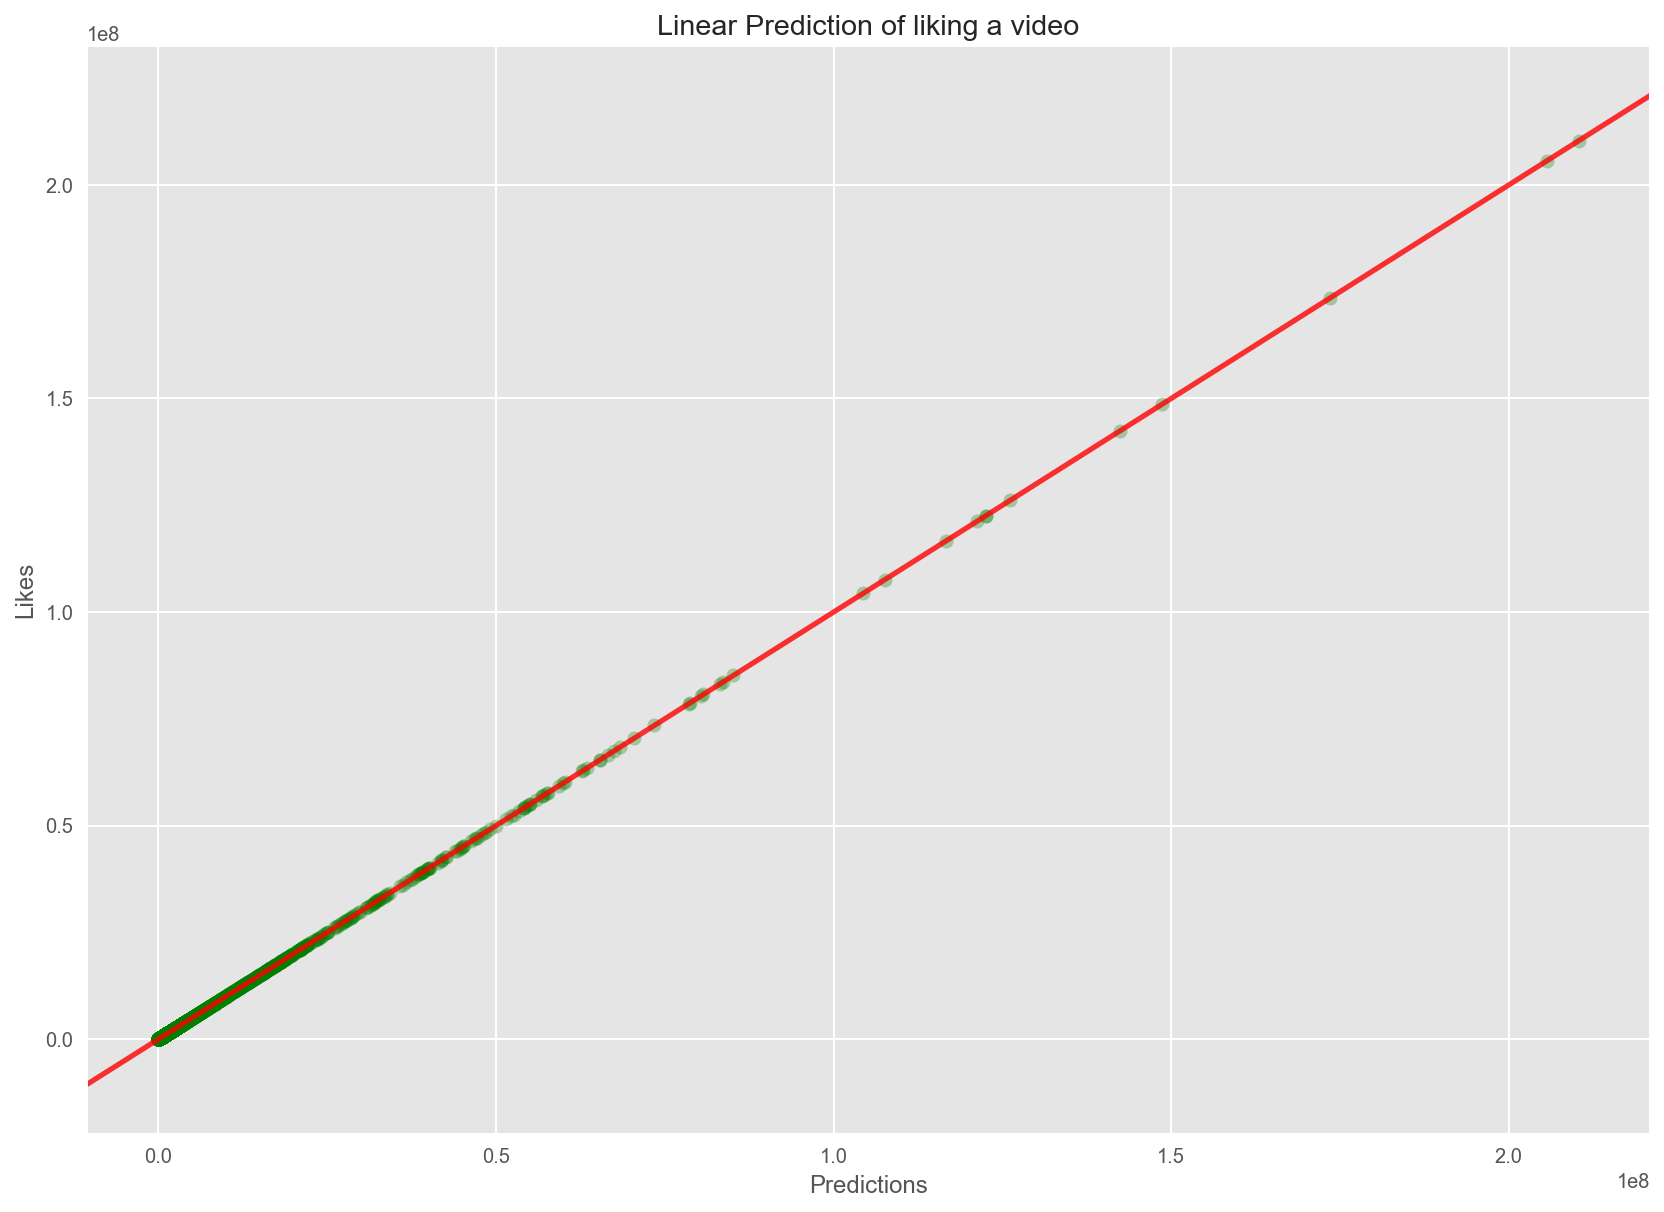

In [223]:
##Visualising the results
plt.figure(figsize=(14,10))
sns.regplot(predictions,y_test,scatter_kws={'alpha':0.3,'color':'Green'},line_kws={'color':'red','alpha':0.8})
plt.xlabel('Predictions')
plt.ylabel('Likes')
plt.title("Linear Prediction of liking a video")
plt.show()

In [224]:
import matplotlib.animation as animation
from sklearn.datasets.samples_generator import make_blobs
import argparse

In [225]:
def sigmoid(sop):
    return 1.0 / (1 + np.exp(-1 * sop))


def error(predicted, target):
    return np.power(predicted - target, 2)


def error_predicted_deriv(predicted, target):
    return 2 * (predicted - target)

def activation_sop_deriv(sop):
    return sigmoid(sop) * (1.0 - sigmoid(sop))

def sop_w_deriv(x):
    return x


def update_w(w, grad, learning_rate):
    return w - learning_rate * grad

w = np.random.rand()
print("Initial W : ", w)


Initial W :  0.3152568473445073


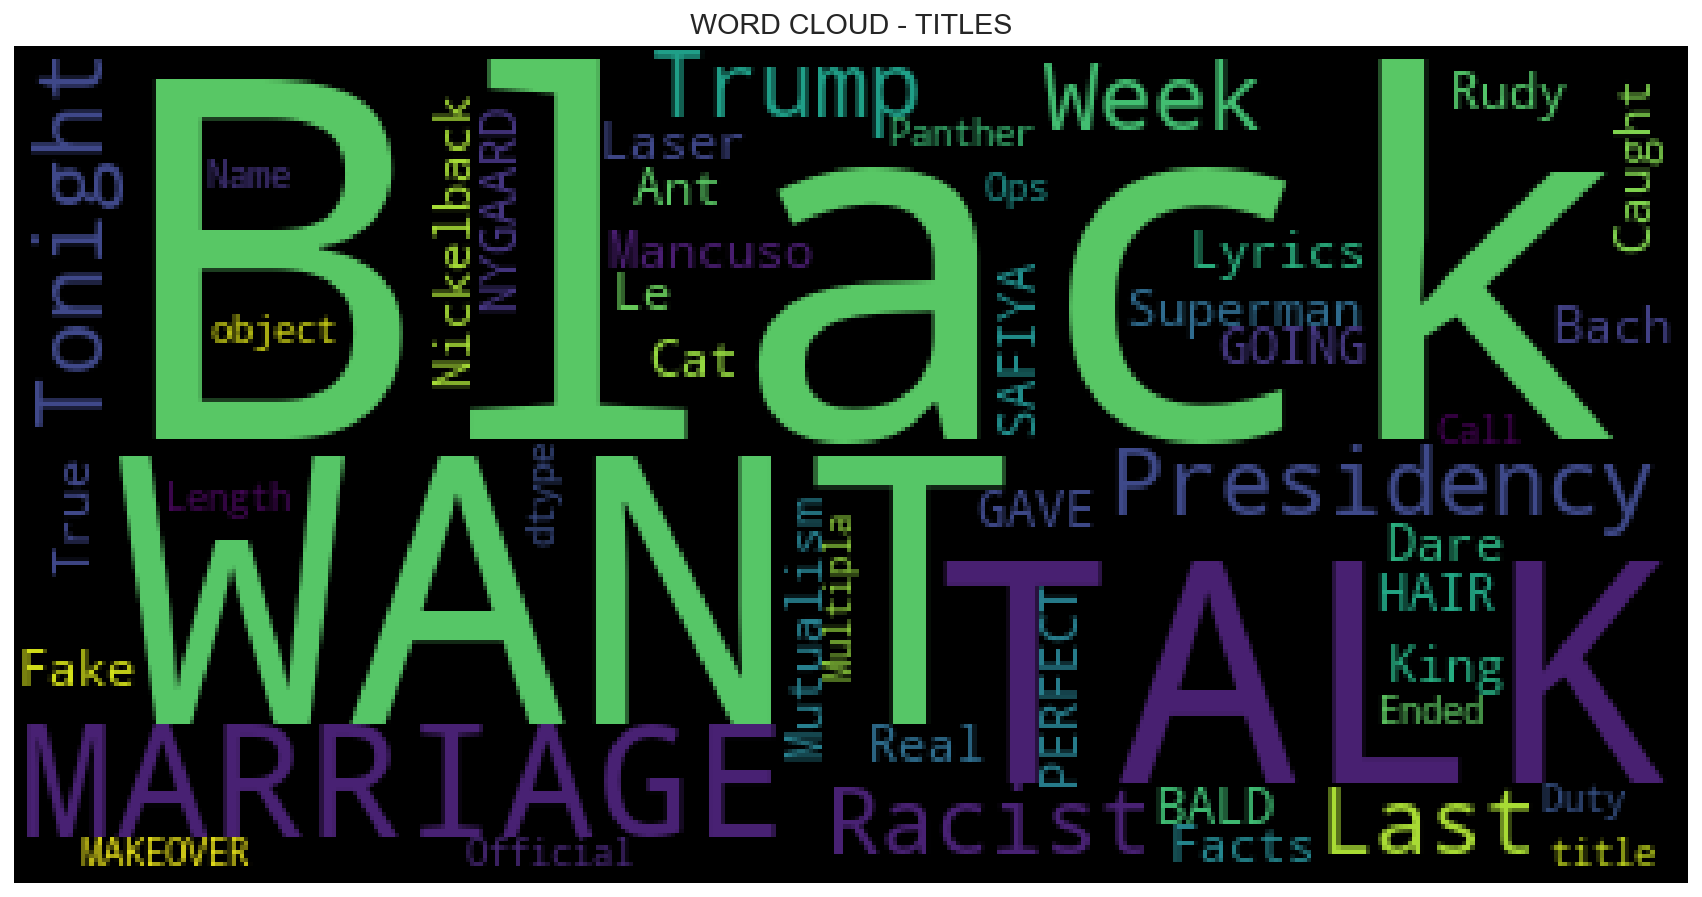

In [227]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(y_tube['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

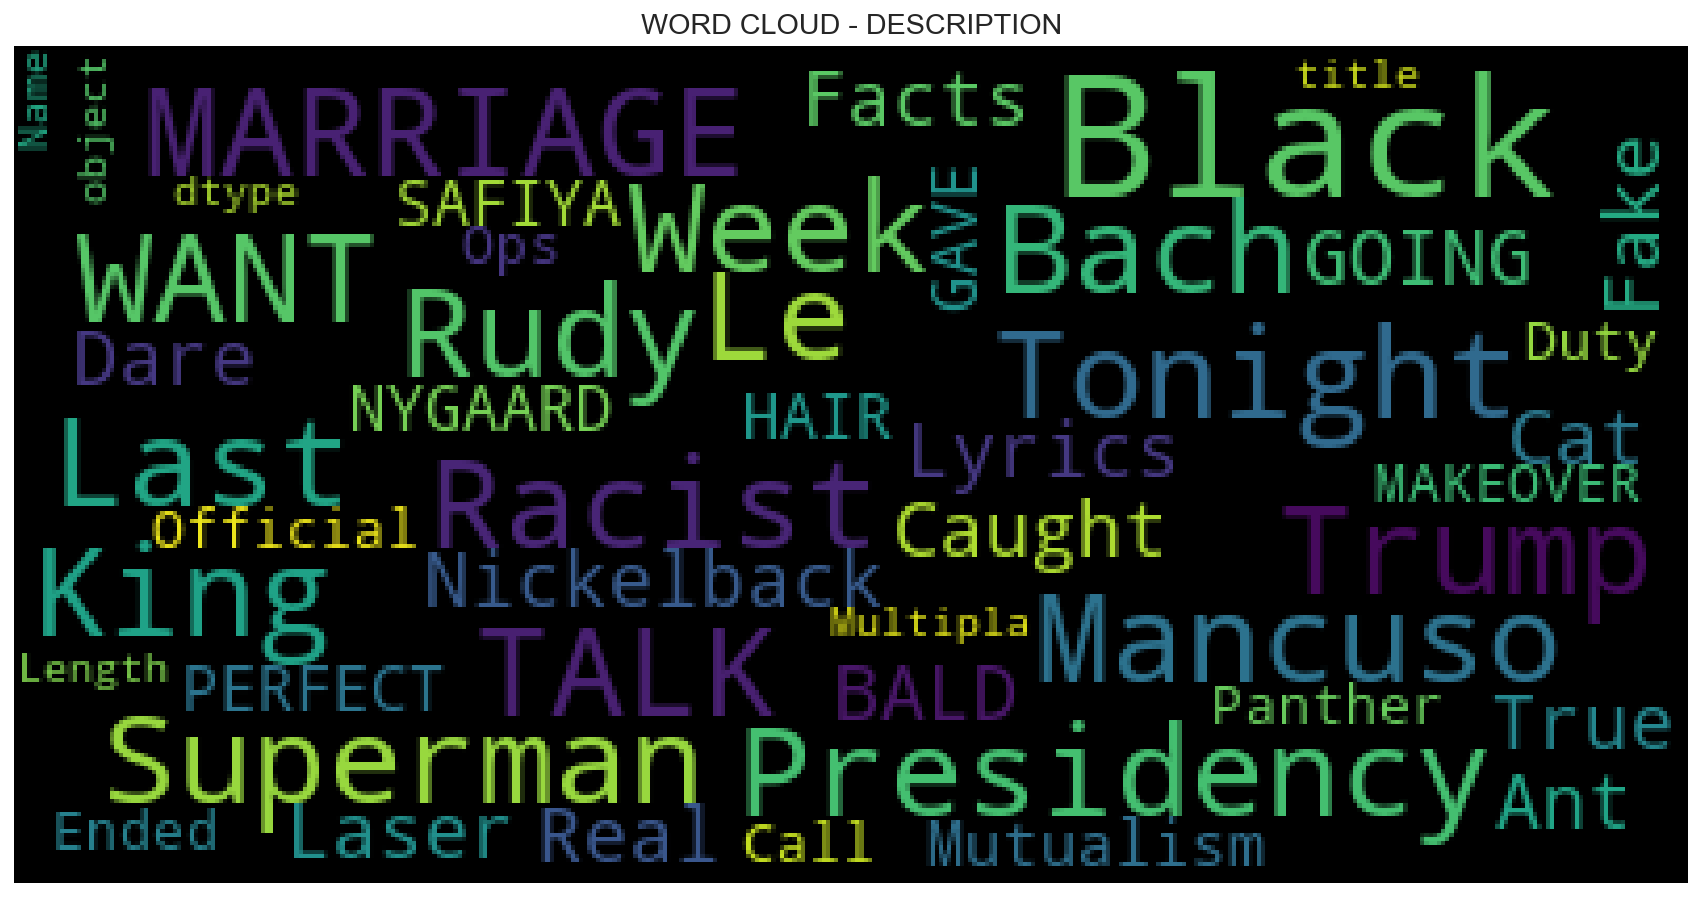

In [228]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(y_tube['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

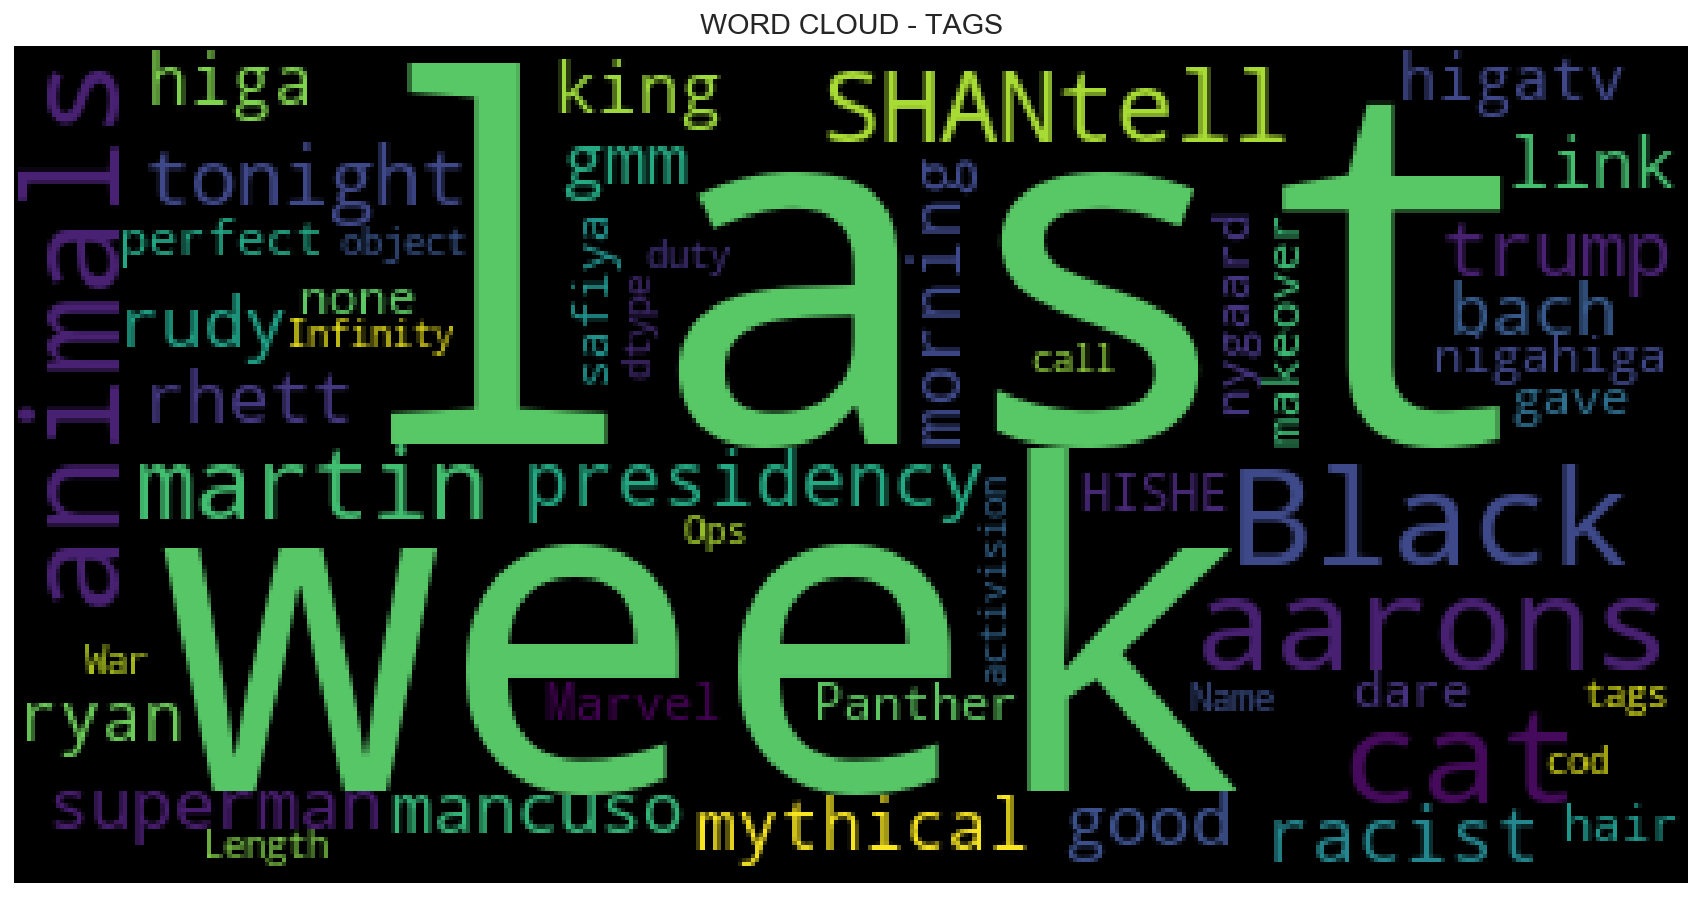

In [229]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(y_tube['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

In [230]:
y_tube['publish_time'] = pd.to_datetime(y_tube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Category Name count
5     6681
2     6207
12    6182
3     6175
1     5502
Name: month, dtype: int64


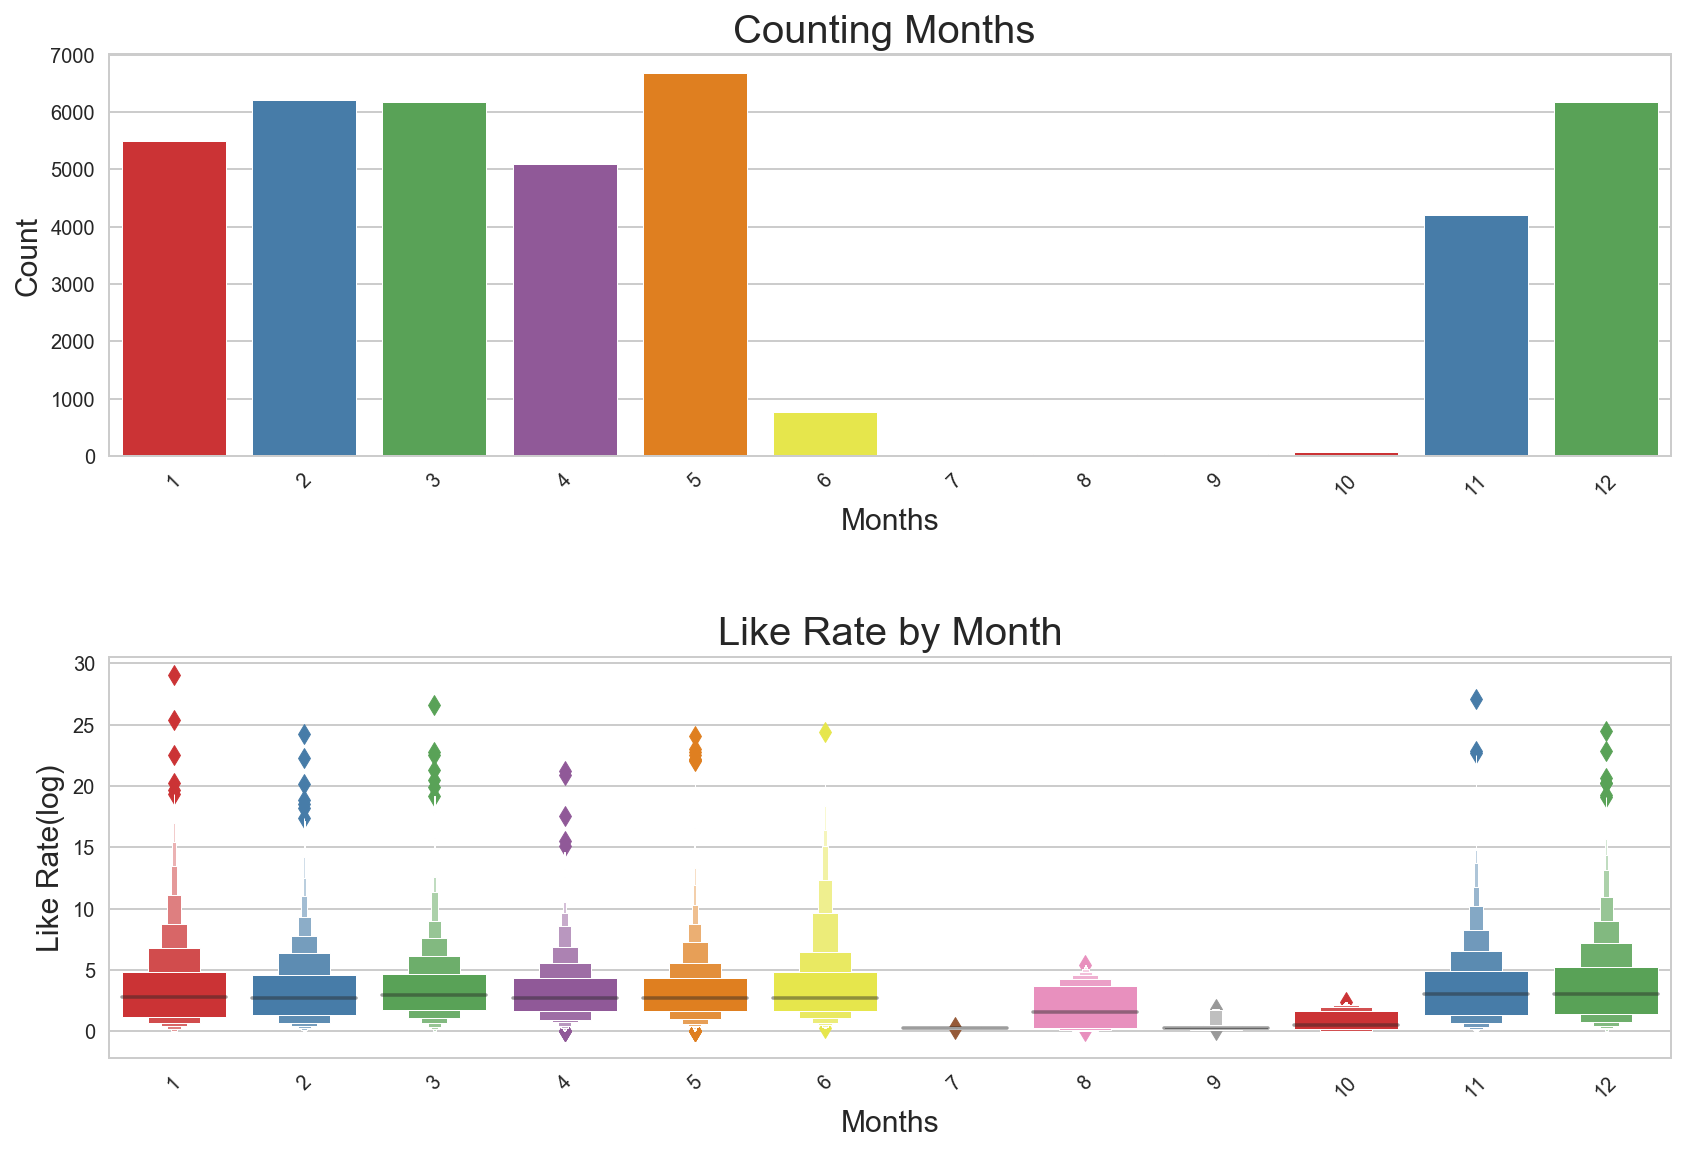

In [236]:
y_tube['month'] = y_tube['publish_time'].dt.month

print("Category Name count")
print(y_tube['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=y_tube, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.boxenplot(x='month', y='like_rate', data=y_tube, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Month", fontsize=20)
g1.set_xlabel("Months", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

In [237]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [238]:
from textblob import TextBlob

In [ ]:
bloblist_tags = list()

df_usa_tags_str=y_tube['tags']
for row in df_usa_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_usa_polarity_tags):
    if df_usa_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_tags['Sentiment_Type'] = df_usa_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_tags)

In [ ]:
bloblist_tags = list()

df_usa_tags_str=y_tube['title']
for row in df_usa_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_usa_polarity_tags):
    if df_usa_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_tags['Sentiment_Type'] = df_usa_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_tags)

In [ ]:
def wcloud(data,bgcolor):
    plt.figure(figsize = (20,15))
    cloud = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    cloud.generate(' '.join(data))
    plt.imshow(cloud)
    plt.axis('off')

In [ ]:
import nltk
 nltk.download('punkt')

In [ ]:
tags_word = y_tube[y_tube['category_name' ]=='News & Politics']['tags'].str.lower().str.cat(sep=' ')

tags_word = re.sub('[^A-Za-z]+', ' ', tags_word)
word_tokens = word_tokenize(tags_word)
filtered_sentence = [w for w in word_tokens if not w in en_stopwords]
without_single_chr = [word for word in filtered_sentence if len(word) > 2]
cleaned_data_title = [word for word in without_single_chr if not word.isdigit()]

wcloud(cleaned_data_title,'white')


In [ ]:
cluster = y_tube[['likes','dislikes', 'views', 'comment_count']]

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
df2 = cluster.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(df2)
df2['cluster']=y_kmeans

In [ ]:
trace1 = go.Scatter3d(
    x = df2['likes'].values,
    y = df2['comment_count'].values,
    z = df2['views'].values,
    mode='markers',
    marker=dict(
        size=12,
        color=df2['cluster'].values,# set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
    
)

data = [trace1]
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Likes'),
        yaxis=dict(title='Comment'),
        zaxis=dict(title='Views')
        ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')